In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading raw data

In [ ]:
try:
    df_customers = pd.read_csv("../data/raw/olist_customers_dataset_dirty.csv")
    print("✔ customers loaded")
except Exception as e:
    df_customers = None
    print("✖ Error loading customers:", e)

try:
    df_orders = pd.read_csv("../data/raw/olist_orders_dataset_dirty.csv")
    print("✔ orders loaded")
except Exception as e:
    df_orders = None
    print("✖ Error loading orders:", e)

try:
    df_order_items = pd.read_csv("../data/raw/olist_order_items_dataset_dirty.csv")
    print("✔ order_items loaded")
except Exception as e:
    df_order_items = None
    print("✖ Error loading order_items:", e)

try:
    df_order_payments = pd.read_csv("../data/raw/olist_order_payments_dataset_dirty.csv")
    print("✔ order_payments loaded")
except Exception as e:
    df_order_payments = None
    print("✖ Error loading order_payments:", e)

try:
    df_order_reviews = pd.read_csv("../data/raw/olist_order_reviews_dataset_dirty.csv")
    print("✔ order_reviews loaded")
except Exception as e:
    df_order_reviews = None
    print("✖ Error loading order_reviews:", e)

try:
    df_products = pd.read_csv("../data/raw/olist_products_dataset_dirty.csv")
    print("✔ products loaded")
except Exception as e:
    df_products = None
    print("✖ Error loading products:", e)

try:
    df_sellers = pd.read_csv("../data/raw/olist_sellers_dataset_dirty.csv")
    print("✔ sellers loaded")
except Exception as e:
    df_sellers = None
    print("✖ Error loading sellers:", e)

try:
    df_geolocation = pd.read_csv("../data/raw/olist_geolocation_dataset_dirty.csv")
    print("✔ geolocation loaded")
except Exception as e:
    df_geolocation = None
    print("✖ Error loading geolocation:", e)

try:
    df_category_translation = pd.read_csv(
        "../data/raw/product_category_name_translation_dirty.csv"
    )
    print("✔ category_translation loaded:")
except Exception as e:
    df_category_translation = None
    print("✖ Error loading category_translation:", e)


✔ customers loaded
✔ orders loaded
✔ order_items loaded
✔ order_payments loaded
✔ order_reviews loaded
✔ products loaded
✔ sellers loaded
✔ geolocation loaded
✔ category_translation loaded:


# Exploring customers data

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104413 entries, 0 to 104412
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               94745 non-null  object 
 1   customer_unique_id        94530 non-null  object 
 2   customer_zip_code_prefix  94292 non-null  float64
 3   customer_city             94530 non-null  object 
 4   customer_state            94530 non-null  object 
 5   noise_flag                78000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.8+ MB


In [ ]:
df_customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,noise_flag
count,94745,94530,94292.000000,94530,94530,78000
unique,90232,87299,NaN,4947,28,3
top,NÃ³ne,NÃ³ne,NaN,sao paulo,SP,X9
freq,537,544,NaN,13899,39354,26179
mean,NaN,NaN,45974.318871,NaN,NaN,NaN
std,NaN,NaN,103509.205437,NaN,NaN,NaN
min,NaN,NaN,-50.000000,NaN,NaN,NaN
25%,NaN,NaN,11075.000000,NaN,NaN,NaN
50%,NaN,NaN,24933.000000,NaN,NaN,NaN
75%,NaN,NaN,62535.000000,NaN,NaN,NaN


In [ ]:
if df_customers is None:
    print("customers dataset not available")
else:
    total_rows = len(df_customers)
    duplicate_count = df_customers.duplicated().sum()

    print(f"Total rows: {total_rows}")
    print(f"Duplicated rows: {duplicate_count}")

    if duplicate_count > 0:
        print("\nSample of duplicated records:")
        duplicated_sample = df_customers[df_customers.duplicated(keep=False)].head(10)
        display(duplicated_sample)
    else:
        print("No duplicated rows found")



Total rows: 104413
Duplicated rows: 11071

Sample of duplicated records:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,noise_flag
23,NaN,NaN,NaN,NaN,NaN,B2
34,469634941c27cd844170935a3cf60b95,ef07ba9aa5226f77264ffa5762b2280b,81750.0,curitiba,PR,B2
53,NaN,NaN,NaN,NaN,NaN,A1
70,NaN,NaN,NaN,NaN,NaN,B2
87,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,A1
101,NaN,NaN,NaN,NaN,NaN,A1
106,NaN,NaN,NaN,NaN,NaN,B2
111,eb67e9bd3357fbacdbef99759f919573,4bc7250d4b42b3374eb6f41b12429592,4710.0,sao paulo,SP,B2
114,NaN,NaN,NaN,NaN,NaN,A1


In [ ]:
if df_customers is None:
    print("customers dataset not available")
else:
    # Count duplicated customer_id values
    duplicated_ids = df_customers["customer_id"].duplicated().sum()
    total_ids = df_customers["customer_id"].shape[0]

    print(f"Total rows: {total_ids}")
    print(f"Duplicated customer_id values: {duplicated_ids}")

    if duplicated_ids > 0:
        print("\nSample of records with duplicated customer_id:")
        dup_sample = (
            df_customers[df_customers["customer_id"]
            .duplicated(keep=False)]
            .sort_values("customer_id")
            .head(10)
        )
        display(dup_sample)
    else:
        print("No duplicated customer_id values found")


Total rows: 104413
Duplicated customer_id values: 14180

Sample of records with duplicated customer_id:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,noise_flag
102431,001051abfcfdbed9f87b4266213a5df1,4ea5df5937187bd3176aee08d4782104,2251.0,sao paulo,SP,B2
3015,001051abfcfdbed9f87b4266213a5df1,4ea5df5937187bd3176aee08d4782104,2251.0,sao paulo,SP,X9
103518,0019c9aaad15b043c48f0a1180f22ce8,4662682dade3cc1bfa04996c5225a849,4141.0,sao paulo,SP,NaN
80331,0019c9aaad15b043c48f0a1180f22ce8,4662682dade3cc1bfa04996c5225a849,4141.0,sao paulo,SP,X9
46975,001a57041f56400917a187dd74e6cbc1,163b27a06a32c2fa565927170b59b5d4,2512.0,sao paulo,SP,X9
100233,001a57041f56400917a187dd74e6cbc1,163b27a06a32c2fa565927170b59b5d4,2512.0,sao paulo,SP,A1
43267,002a10e899b62a460b0116e0b68697ad,660e4e077b40d477e2ffdb2da6349b79,18650.0,sao manuel,SP,NaN
100686,002a10e899b62a460b0116e0b68697ad,660e4e077b40d477e2ffdb2da6349b79,18650.0,sao manuel,SP,A1
102896,002ef7e55600d44ead53f7c1644e5222,6e9b8e9f9c3fad22d6f81b2628750018,36016.0,juiz de fora,MG,A1
55640,002ef7e55600d44ead53f7c1644e5222,6e9b8e9f9c3fad22d6f81b2628750018,36016.0,juiz de fora,MG,NaN


In [ ]:
if df_customers is None:
    print("customers dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")
    nulls_per_column = df_customers.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_customers[df_customers.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_customers[df_customers.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")


NULL VALUES PER COLUMN:



customer_id                  9668
customer_unique_id           9883
customer_zip_code_prefix    10121
customer_city                9883
customer_state               9883
noise_flag                  26413
dtype: int64


Rows with at least one NULL value: 34219

Sample rows containing NULL values:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,noise_flag
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,NaN
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575.0,belo horizonte,MG,NaN
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400.0,montes claros,MG,NaN
11,5aa9e4fdd4dfd20959cad2d772509598,2a46fb94aef5cbeeb850418118cee090,20231.0,rio de janeiro,RJ,NaN
14,1f1c7bf1c9b041b292af6c1c4470b753,3151a81801c8386361b62277d7fa5ecf,95110.0,caxias do sul,RS,NaN
16,a7c125a0a07b75146167b7f04a7f8e98,5c2991dbd08bbf3cf410713c4de5a0b5,22750.0,rio de janeiro,RJ,NaN
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416.0,sao paulo,SP,NaN
23,NaN,NaN,NaN,NaN,NaN,B2
24,cb721d7b4f271fd87011c4c83462c076,a5844ba4bfc8d0cc61d13027c7e63bcc,8225.0,sao paulo,SP,NaN
29,e3109970a3fe8021d5ff82c577ce5606,a8654e2af5da6bb72f52c22b164855e1,5528.0,sao paulo,SP,NaN


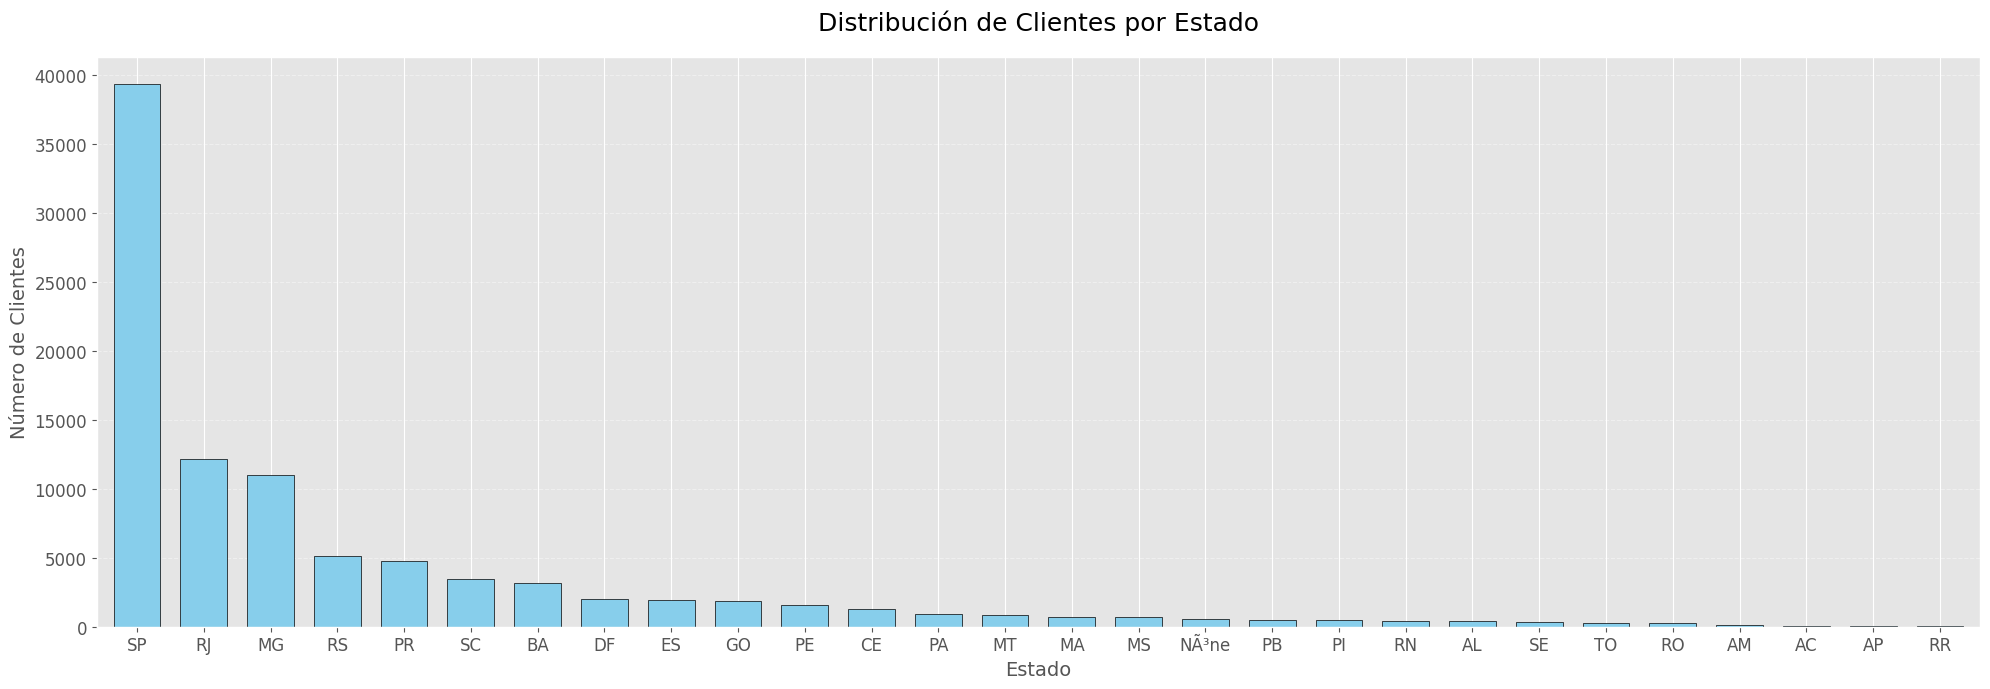

In [ ]:
# Aumentamos el ancho a 20 pulgadas (el doble de lo estándar que suele usar Colab)
plt.figure(figsize=(20, 7))

# Obtenemos los datos
state_counts = df_customers['customer_state'].value_counts()

# Creamos el gráfico con barras algo más delgadas (width=0.7) para que no se toquen
state_counts.plot(kind='bar', color='skyblue', edgecolor='black', width=0.7)

# Personalización de títulos
plt.title('Distribución de Clientes por Estado', fontsize=18, pad=20)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)

# Ajustamos las etiquetas del eje X:
# Tamaño de fuente más grande y rotación 0 para que se lean horizontalmente
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

# Cuadrícula horizontal sutil
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Ajuste final para que no se corten los bordes
plt.tight_layout()

plt.show()

# Exploring orders data

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104413 entries, 0 to 104412
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       94745 non-null  object
 1   customer_id                    94745 non-null  object
 2   order_status                   94530 non-null  object
 3   order_purchase_timestamp       95029 non-null  object
 4   order_approved_at              94399 non-null  object
 5   order_delivered_carrier_date   93530 non-null  object
 6   order_delivered_customer_date  92515 non-null  object
 7   order_estimated_delivery_date  95029 non-null  object
 8   noise_flag                     78116 non-null  object
dtypes: object(9)
memory usage: 7.2+ MB


In [ ]:
df_orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,noise_flag
count,94745,94745,94530,95029,94399,93530,92515,95029,78116
unique,90228,90236,13,84831,82340,70666,82109,460,3
top,NÃ³ne,NÃ³ne,delivered,32/13/2020,NÃ³ne,05/06/2018,05/06/2018,32/13/2020,X9
freq,537,537,91181,1747,544,1754,1751,1773,26220


In [ ]:
duplicate_rows = df_orders.duplicated().sum()
print(f"Duplicated rows: {duplicate_rows}")

if duplicate_rows > 0:
    display(df_orders[df_orders.duplicated(keep=False)].head(10))


Duplicated rows: 10832


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,noise_flag
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,NaN
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
50,138849fd84dff2fb4ca70a0a34c4aa1c,9b18f3fc296990b97854e351334a32f6,delivered,2018-02-01 14:02:19,2018-02-03 02:53:07,2018-02-06 19:13:26,2018-02-14 13:41:59,2018-02-23 00:00:00,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
77,634e8f4c0f6744a626f77f39770ac6aa,05e996469a2bf9559c7122b87e156724,delivered,2017-08-09 18:32:47,2017-08-09 18:45:18,2017-08-10 20:21:53,2017-08-16 18:17:54,2017-08-31 00:00:00,A1
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9


In [ ]:
if df_orders is None:
    print("orders dataset not available")
else:
    total_rows = len(df_orders)
    duplicated_order_ids = df_orders["order_id"].duplicated().sum()

    print(f"Total rows: {total_rows}")
    print(f"Duplicated order_id values: {duplicated_order_ids}")

    if duplicated_order_ids > 0:
        print("\nSample of records with duplicated order_id:")
        dup_orders = (
            df_orders[df_orders["order_id"].duplicated(keep=False)]
            .sort_values("order_id")
            .head(10)
        )
        display(dup_orders)
    else:
        print("No duplicated order_id values found")

Total rows: 104413
Duplicated order_id values: 14184

Sample of records with duplicated order_id:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,noise_flag
92213,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,??,2018-03-20 18:35:21,32/13/2020,??,05/06/2018,X9
99606,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29 00:00:00,A1
103244,000aed2e25dbad2f9ddb70584c5a2ded,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22 00:00:00,NaN
97103,000aed2e25dbad2f9ddb70584c5a2ded,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22 00:00:00,A1
75759,002f98c0f7efd42638ed6100ca699b42,75fd1fb0bb511fc71ac2b2649c02b21b,delivered,2017-08-04 09:19:10,2017-08-04 09:30:15,2017-08-04 18:09:47,2017-08-07 19:07:30,2017-09-05 00:00:00,X9
100045,002f98c0f7efd42638ed6100ca699b42,75fd1fb0bb511fc71ac2b2649c02b21b,delivered,2017-08-04 09:19:10,2017-08-04 09:30:15,2017-08-04 18:09:47,2017-08-07 19:07:30,2017-09-05 00:00:00,X9
91211,0035246a40f520710769010f752e7507,4bcf2ad7ccc061c13ff360aae5b7abcd,delivered,2017-08-17 00:57:23,2017-08-17 01:25:39,2017-08-22 15:33:53,2017-08-28 19:14:03,2017-09-06 00:00:00,A1
103027,0035246a40f520710769010f752e7507,4bcf2ad7ccc061c13ff360aae5b7abcd,delivered,2017-08-17 00:57:23,2017-08-17 01:25:39,2017-08-22 15:33:53,2017-08-28 19:14:03,2017-09-06 00:00:00,NaN
101483,003cc6161d7a2593f2525cce0c330d32,7d9802889236ab8fc541bfb438978cd7,delivered,2018-08-03 19:33:35,2018-08-03 20:04:14,2018-08-06 15:02:00,2018-08-07 11:32:11,2018-08-08 00:00:00,NaN
87282,003cc6161d7a2593f2525cce0c330d32,7d9802889236ab8fc541bfb438978cd7,delivered,2018-08-03 19:33:35,2018-08-03 20:04:14,2018-08-06 15:02:00,2018-08-07 11:32:11,2018-08-08 00:00:00,X9


In [ ]:
if df_orders is None:
    print("orders dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")
    nulls_per_column = df_orders.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_orders[df_orders.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_orders[df_orders.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")

NULL VALUES PER COLUMN:



order_id                          9668
customer_id                       9668
order_status                      9883
order_purchase_timestamp          9384
order_approved_at                10014
order_delivered_carrier_date     10883
order_delivered_customer_date    11898
order_estimated_delivery_date     9384
noise_flag                       26297
dtype: int64


Rows with at least one NULL value: 35580

Sample rows containing NULL values:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,noise_flag
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,NaN
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,NaN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,NaN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,NaN
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,A1
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,NaN
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,NaN
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,NaN
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,NaN
18,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11 00:00:00,NaN


In [ ]:
# Logical date validation - orders
# ----------------------------------

if df_orders is None:
    print("orders dataset not available")
else:
    # Define date columns
    date_columns = [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date"
    ]

    # Create a temporary copy for validation
    df_dates = df_orders[date_columns].copy()

    # Convert to datetime (without modifying original df)
    for col in date_columns:
        df_dates[col] = pd.to_datetime(df_dates[col], errors="coerce")

    print("Rows with invalid date sequences:\n")

    # Logical validations
    invalid_purchase_approved = df_dates[
        (df_dates["order_approved_at"] < df_dates["order_purchase_timestamp"])
    ]

    invalid_approved_carrier = df_dates[
        (df_dates["order_delivered_carrier_date"] < df_dates["order_approved_at"])
    ]

    invalid_carrier_customer = df_dates[
        (df_dates["order_delivered_customer_date"] < df_dates["order_delivered_carrier_date"])
    ]

    print(f"Approved before purchase: {invalid_purchase_approved.shape[0]}")
    print(f"Carrier delivery before approval: {invalid_approved_carrier.shape[0]}")
    print(f"Customer delivery before carrier delivery: {invalid_carrier_customer.shape[0]}")

    # Display samples if issues exist
    if not invalid_purchase_approved.empty:
        print("\nSample: approved before purchase")
        display(invalid_purchase_approved.head(5))

    if not invalid_approved_carrier.empty:
        print("\nSample: carrier delivery before approval")
        display(invalid_approved_carrier.head(5))

    if not invalid_carrier_customer.empty:
        print("\nSample: customer delivery before carrier delivery")
        display(invalid_carrier_customer.head(5))

Rows with invalid date sequences:

Approved before purchase: 0
Carrier delivery before approval: 1229
Customer delivery before carrier delivery: 24

Sample: carrier delivery before approval


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
15,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32
64,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58
199,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19
210,2018-07-22 22:30:05,2018-07-23 12:31:53,2018-07-23 12:24:00,2018-07-24 19:26:42
415,2018-07-22 13:04:47,2018-07-27 23:31:09,2018-07-24 14:03:00,2018-07-28 00:05:39



Sample: customer delivery before carrier delivery


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
6437,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56
9553,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51
13487,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28
14474,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10
19268,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41


/tmp/ipython-input-2145747058.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = df_orders_clean.set_index('order_purchase_timestamp').resample('M').size()


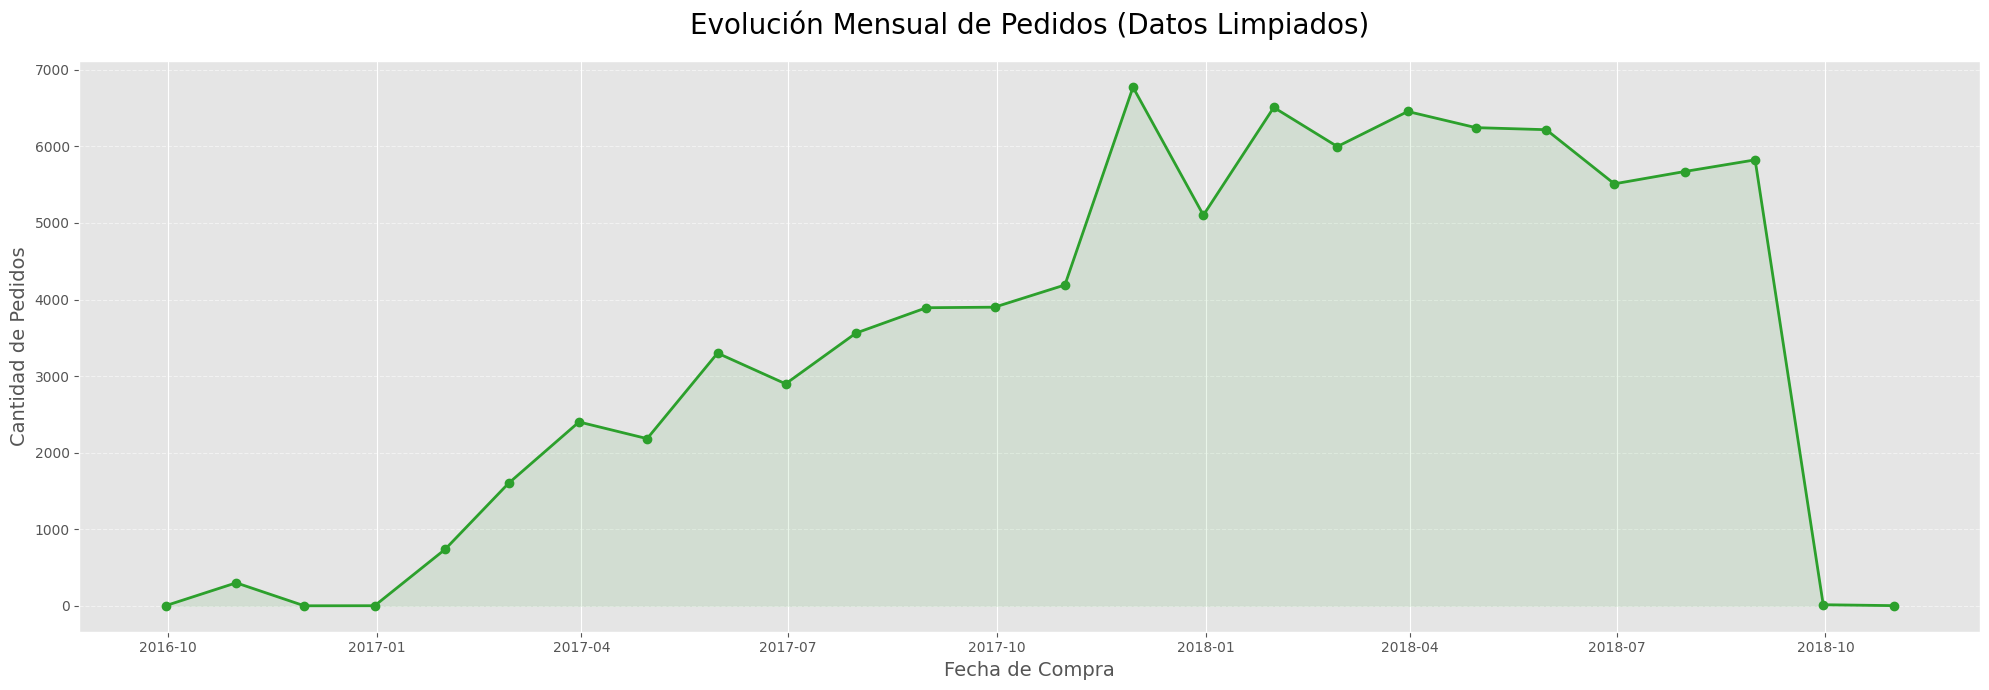

In [ ]:
# errors='coerce' reemplaza los "??" o basura por valores Nulos (NaT)
df_orders['order_purchase_timestamp'] = pd.to_datetime(
    df_orders['order_purchase_timestamp'],
    errors='coerce'
)

# Eliminamos las filas que quedaron con fecha nula para que no afecten el gráfico
df_orders_clean = df_orders.dropna(subset=['order_purchase_timestamp'])

# 2. Agrupamos por mes y año
orders_per_month = df_orders_clean.set_index('order_purchase_timestamp').resample('M').size()

# 3. Creación del gráfico (Ancho de 20 para que se vea bien)
plt.figure(figsize=(20, 7))

# Graficamos
plt.plot(orders_per_month.index, orders_per_month.values,
         marker='o', linestyle='-', color='#2ca02c', linewidth=2)

# Relleno estético
plt.fill_between(orders_per_month.index, orders_per_month.values, color='#2ca02c', alpha=0.1)

# Personalización
plt.title('Evolución Mensual de Pedidos (Datos Limpiados)', fontsize=20, pad=20)
plt.xlabel('Fecha de Compra', fontsize=14)
plt.ylabel('Cantidad de Pedidos', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

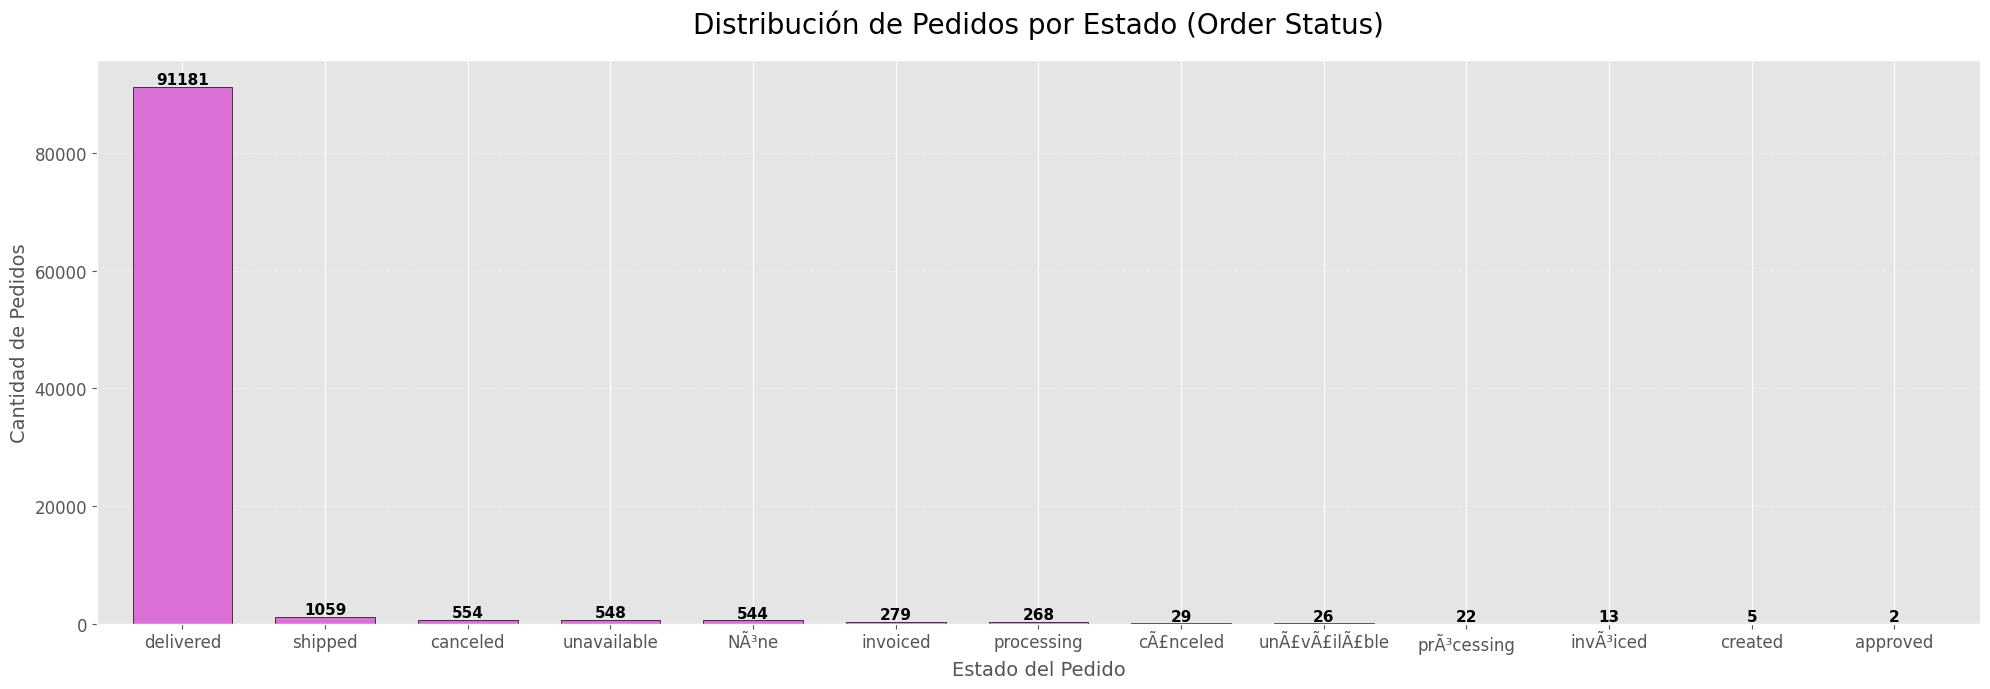

In [ ]:
# Configuramos el tamaño extra ancho (20, 7)
plt.figure(figsize=(20, 7))

# Obtenemos el conteo de cada estado
status_counts = df_orders['order_status'].value_counts()

# Creamos el gráfico de barras
# Usamos un color diferente (ej: orchid) para variar
status_counts.plot(kind='bar', color='orchid', edgecolor='black', width=0.7)

# Añadimos los títulos y etiquetas
plt.title('Distribución de Pedidos por Estado (Order Status)', fontsize=20, pad=20)
plt.xlabel('Estado del Pedido', fontsize=14)
plt.ylabel('Cantidad de Pedidos', fontsize=14)

# Personalizamos los ejes
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Añadimos etiquetas de texto arriba de cada barra para saber el número exacto
for i, v in enumerate(status_counts):
    plt.text(i, v + 500, str(v), ha='center', fontsize=11, fontweight='bold')

# Cuadrícula horizontal sutil
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Exploring order_items data

In [ ]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118282 entries, 0 to 118281
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             107274 non-null  object 
 1   order_item_id        106823 non-null  float64
 2   product_id           107274 non-null  object 
 3   seller_id            107274 non-null  object 
 4   shipping_limit_date  107611 non-null  object 
 5   price                106823 non-null  float64
 6   freight_value        106823 non-null  float64
 7   noise_flag           88665 non-null   object 
dtypes: float64(3), object(5)
memory usage: 7.2+ MB


In [ ]:
df_order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,noise_flag
count,107274,106823.000000,107274,107274,107611,106823.000000,106823.000000,88665
unique,91624,NaN,35798,6498,81680,NaN,NaN,3
top,NÃ³ne,NaN,NÃ³ne,6560211a19b47992c3666cc44a7e94c0,??,NaN,NaN,X9
freq,600,NaN,600,1780,2003,NaN,NaN,29759
mean,NaN,12371.101420,NaN,NaN,NaN,12286.381040,12635.224191,NaN
std,NaN,105073.391993,NaN,NaN,NaN,104102.434706,106272.921177,NaN
min,NaN,-50.000000,NaN,NaN,NaN,-50.000000,-50.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.010000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,75.770000,16.340000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,139.900000,21.710000,NaN


In [ ]:
exact_dups = df_order_items.duplicated().sum()
print(f"Exact duplicated rows: {exact_dups}")

if exact_dups > 0:
    display(df_order_items[df_order_items.duplicated(keep=False)].head(10))


Exact duplicated rows: 12396


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,noise_flag
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
66,00276d5c3491fbf55305e26891040df9,1.0,71c89e9d8fa274b017279aa322cd0e19,8f78f0903005064036736c7173a5c2ed,2018-02-27 11:55:57,44.9,23.22,A1
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
124,NaN,NaN,NaN,NaN,??,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9


In [ ]:
logical_dups = df_order_items.duplicated(
    subset=["order_id", "order_item_id"]
).sum()

print(f"Duplicated (order_id, order_item_id): {logical_dups}")

if logical_dups > 0:
    dup_items = (
        df_order_items[
            df_order_items.duplicated(
                subset=["order_id", "order_item_id"], keep=False
            )
        ]
        .sort_values(["order_id", "order_item_id"])
        .head(10)
    )
    display(dup_items)


Duplicated (order_id, order_item_id): 15811


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,noise_flag
38,0016dfedd97fc2950e388d2971d718c7,1.0,4089861a1bd4685da70bddd6b4f974f1,a35124e2d763d7ca3fbe3b97d143200f,2017-05-05 10:05:12,49.75,20.80,A1
114348,0016dfedd97fc2950e388d2971d718c7,1.0,4089861a1bd4685da70bddd6b4f974f1,a35124e2d763d7ca3fbe3b97d143200f,2017-05-05 10:05:12,49.75,20.80,X9
66,00276d5c3491fbf55305e26891040df9,1.0,71c89e9d8fa274b017279aa322cd0e19,8f78f0903005064036736c7173a5c2ed,2018-02-27 11:55:57,44.90,23.22,A1
116543,00276d5c3491fbf55305e26891040df9,1.0,71c89e9d8fa274b017279aa322cd0e19,8f78f0903005064036736c7173a5c2ed,2018-02-27 11:55:57,44.90,23.22,A1
76,002c9def9c9b951b1bec6d50753c9891,2.0,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,B2
112937,002c9def9c9b951b1bec6d50753c9891,2.0,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,X9
91,00337fe25a3780b3424d9ad7c5a4b35e,1.0,1f9799a175f50c9fa725984775cac5c5,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,59.90,9.94,B2
112791,00337fe25a3780b3424d9ad7c5a4b35e,1.0,1f9799a175f50c9fa725984775cac5c5,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,59.90,9.94,X9
106,003cc6161d7a2593f2525cce0c330d32,1.0,fadc89c2a60ff96b18827644074dfd70,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-08-07 20:04:14,85.00,12.90,B2
116914,003cc6161d7a2593f2525cce0c330d32,1.0,fadc89c2a60ff96b18827644074dfd70,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-08-07 20:04:14,85.00,12.90,X9


In [ ]:
if df_order_items is None:
    print("order_items dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")

    nulls_per_column = df_order_items.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_order_items[df_order_items.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_order_items[df_order_items.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")

NULL VALUES PER COLUMN:



order_id               11008
order_item_id          11459
product_id             11008
seller_id              11008
shipping_limit_date    10671
price                  11459
freight_value          11459
noise_flag             29617
dtype: int64


Rows with at least one NULL value: 38439

Sample rows containing NULL values:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,noise_flag
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,NaN
6,00054e8431b9d7675808bcb819fb4a32,1.0,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,NaN
11,00063b381e2406b52ad429470734ebd5,1.0,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39,45.00,12.98,NaN
12,0006ec9db01a64e59a68b2c340bf65a7,1.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,05/06/2018,74.00,23.32,NaN
20,000e63d38ae8c00bbcb5a30573b99628,1.0,553e0e7590d3116a072507a3635d2877,1c129092bf23f28a5930387c980c0dfc,05/06/2018,47.90,8.88,NaN
23,001021efaa8636c29475e7734483457d,1.0,5d7c23067ed3fc8c6e699b9373d5890b,6560211a19b47992c3666cc44a7e94c0,2018-03-05 09:35:41,49.00,15.10,NaN
26,0011d82c4b53e22e84023405fb467e57,1.0,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.00,26.33,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1


In [ ]:
if df_order_items is None:
    print("order_items dataset not available")
else:
    # 1) Invalid prices (<= 0)
    invalid_price = df_order_items[df_order_items["price"] <= 0]
    print(f"Items with price <= 0: {invalid_price.shape[0]}")

    if not invalid_price.empty:
        print("\nSample of invalid price records:")
        display(invalid_price.head(10))

    # 2) Invalid freight values (< 0)
    invalid_freight = df_order_items[df_order_items["freight_value"] < 0]
    print(f"\nItems with negative freight_value: {invalid_freight.shape[0]}")

    if not invalid_freight.empty:
        print("\nSample of invalid freight records:")
        display(invalid_freight.head(10))

    # 3) Suspicious zero freight (optional but useful)
    zero_freight = df_order_items[df_order_items["freight_value"] == 0]
    print(f"\nItems with zero freight_value: {zero_freight.shape[0]}")

    if not zero_freight.empty:
        print("\nSample of zero freight records:")
        display(zero_freight.head(10))

Items with price <= 0: 1225

Sample of invalid price records:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,noise_flag
105,003a94f778ef8cfd50247c8c1b582257,-50.0,452f66a0f164cac57802e2cea93188ac,f80edd2c5aaa505cc4b0a3b219abf4b8,2018-08-07 15:05:14,-50.0,-50.0,A1
143,00571ded73b3c061925584feab0db425,999999.0,8695c431b31927efef5343e675f279e7,fe2032dab1a61af8794248c8196565c9,2017-05-25 21:10:16,-50.0,-50.0,NaN
160,006557c3221c1fcd02b0106343ab357b,-50.0,7d187801885842645486f00fb166f378,d91fb3b7d041e83b64a00a3edfb37e4f,2018-03-01 14:51:13,-50.0,-50.0,A1
284,00b5e1c770b1868ec1b6b726be3aa9b9,999999.0,5b4b8595bd33017cf3c87c8ab09c2e42,ef30892870c278497523264be1be2241,2018-01-09 19:27:05,-50.0,999999.0,NaN
383,00f1a34f176151c4dcbd802c244e1072,999999.0,013ee64977aaa6b2b25475095162e0e9,640e21a7d01df7614a3b4923e990d40c,2018-08-20 15:35:26,-50.0,999999.0,B2
482,011bf86f1b7dacebda2c874333cf656b,999999.0,9ecadb84c81da840dbf3564378b586e9,1025f0e2d44d7041d6cf58b6550e0bfa,2018-03-16 19:48:24,-50.0,999999.0,B2
496,01237c761ffb72594a466ed514518af0,-50.0,629e019a6f298a83aeecc7877964f935,c003204e1ab016dfa150abc119207b24,2018-07-09 23:20:59,-50.0,123456.0,A1
609,FAKE_KEY_1498,123456.0,FAKE_KEY_1498,FAKE_KEY_1498,2018-01-29 21:59:51,-50.0,123456.0,B2
703,01a0013ddc7cd129e350e8671b56a263,999999.0,152397b614be35e54106663bd5671f7d,a4b6b9b992b46e9ef863637af96e04bc,2017-03-29 20:02:41,-50.0,999999.0,X9
740,01b6d15407d425529cbf0ec96258cb84,123456.0,78c3942245093508f8e17ffc06a0dfcf,4830e40640734fc1c52cd21127c341d4,2018-03-19 15:35:37,-50.0,123456.0,B2



Items with negative freight_value: 1194

Sample of invalid freight records:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,noise_flag
105,003a94f778ef8cfd50247c8c1b582257,-50.0,452f66a0f164cac57802e2cea93188ac,f80edd2c5aaa505cc4b0a3b219abf4b8,2018-08-07 15:05:14,-50.0,-50.0,A1
143,00571ded73b3c061925584feab0db425,999999.0,8695c431b31927efef5343e675f279e7,fe2032dab1a61af8794248c8196565c9,2017-05-25 21:10:16,-50.0,-50.0,NaN
154,005e5166e99d1e4d0c4f808b0540ba94,-50.0,03bb24d19ea7449ce170e0888d830707,e9bc59e7b60fc3063eb2290deda4cced,2018-03-01 02:09:02,999999.0,-50.0,X9
160,006557c3221c1fcd02b0106343ab357b,-50.0,7d187801885842645486f00fb166f378,d91fb3b7d041e83b64a00a3edfb37e4f,2018-03-01 14:51:13,-50.0,-50.0,A1
189,007beb35f98c075747e6fc4fd1c0cb73,999999.0,ce130b350f529a1d6288f927da7404ea,e38db885400cd35c71dfd162f2c1dbcf,2017-09-28 08:50:17,999999.0,-50.0,X9
257,00a843f5a80c7aea894c558acc29f513,123456.0,6536314c94d43b787fc1c622941da14b,2138ccb85b11a4ec1e37afbd1c8eda1f,2017-09-08 18:55:14,999999.0,-50.0,A1
274,NaN,123456.0,NaN,NaN,NaN,123456.0,-50.0,A1
729,01b1a7fdae9ad1837d6ab861705a1fa5,123456.0,3fae92f8d0ebb3317991934a6d717c47,1900267e848ceeba8fa32d80c1a5f5a8,2017-06-02 16:02:58,123456.0,-50.0,B2
1002,NaN,-50.0,NaN,NaN,NaN,999999.0,-50.0,A1
1117,029b1d3a355dec12cfed60927f076a9d,-50.0,2dd91cf063cf57cb0eebef072746daab,c70c1b0d8ca86052f45a432a38b73958,2018-07-23 17:25:19,123456.0,-50.0,B2



Items with zero freight_value: 347

Sample of zero freight records:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,noise_flag
258,00a870c6c06346e85335524935c600c0,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0,X9
483,011c899816ea29773525bd3322dbb6aa,1.0,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0,A1
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1.0,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,NaN
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2.0,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,B2
1784,04105b54650921ca3246f52e6f175f46,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-27 09:31:35,69.9,0.0,B2
2232,0517a3e68dac3308995edca2144db36e,1.0,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,??,99.9,0.0,B2
2714,061bÃ£2e2d7544790b6ed6b5b4dd9278c,1.0,53b36df67ebb7c41585e8d54d6772e08,7d13fcÃ£15225358621be4086e1eb0964,2018-05-09 23:10:46,110.0,0.0,B2
3224,07441f525824bc6b31d4dc19c5d49fc9,1.0,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-26 13:31:30,106.9,0.0,X9
3378,079f16689c29acb6cab92978e6af2137,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-11 18:15:13,69.9,0.0,B2
3648,0849ccbfff0e8fd7168be6a62ca74a0d,1.0,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,05/06/2018,99.9,0.0,NaN


# Exploring geolocation data

In [ ]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050171 entries, 0 to 1050170
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  948295 non-null  float64
 1   geolocation_lat              948295 non-null  float64
 2   geolocation_lng              948295 non-null  float64
 3   geolocation_city             950231 non-null  object 
 4   geolocation_state            950231 non-null  object 
 5   noise_flag                   788612 non-null  object 
dtypes: float64(3), object(3)
memory usage: 48.1+ MB


In [ ]:
df_geolocation.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,noise_flag
count,948295.000000,948295.000000,948295.000000,950231,950231,788612
unique,NaN,NaN,NaN,11727,28,3
top,NaN,NaN,NaN,sao paulo,SP,A1
freq,NaN,NaN,NaN,121785,381859,263054
mean,47818.306110,12412.177497,12413.181764,NaN,NaN,NaN
std,105619.381858,105335.957155,105390.189845,NaN,NaN,NaN
min,-50.000000,-50.000000,-101.466766,NaN,NaN,NaN
25%,11035.000000,-23.606567,-48.614543,NaN,NaN,NaN
50%,27330.000000,-22.911237,-46.631890,NaN,NaN,NaN
75%,66055.000000,-19.929996,-43.493295,NaN,NaN,NaN


In [ ]:
exact_dups = df_geolocation.duplicated().sum()
print(f"Exact duplicated rows: {exact_dups}")

if exact_dups > 0:
    display(df_geolocation[df_geolocation.duplicated(keep=False)].head(10))


Exact duplicated rows: 218105


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,noise_flag
0,123456.0,999999.000000,-50.000000,NaN,NaN,B2
2,1046.0,-23.546129,-46.642951,sao paulo,SP,NaN
3,999999.0,-50.000000,123456.000000,sao paulo,SP,NaN
6,1047.0,-23.546273,-46.641225,sao paulo,SP,A1
7,1013.0,-23.546923,-46.634264,sao paulo,SP,A1
10,1013.0,-23.547325,-46.634184,sao paulo,SP,X9
12,NaN,NaN,NaN,NaN,NaN,A1
14,NaN,NaN,NaN,NÃ³ne,NÃ³ne,X9
15,1046.0,-23.546081,-46.644820,sÃ£Ã³ pÃ£ulÃ³,SP,X9
17,1024.0,-23.541390,-46.629899,são paulo,SP,B2


In [ ]:
logical_dups = df_geolocation.duplicated(
    subset=[
        "geolocation_zip_code_prefix",
        "geolocation_city",
        "geolocation_state"
    ]
).sum()

print(f"Logical duplicated locations: {logical_dups}")

if logical_dups > 0:
    display(
        df_geolocation[
            df_geolocation.duplicated(
                subset=[
                    "geolocation_zip_code_prefix",
                    "geolocation_city",
                    "geolocation_state"
                ],
                keep=False
            )
        ]
        .head(10)
    )


Logical duplicated locations: 1002372


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,noise_flag
0,123456.0,999999.000000,-50.000000,NaN,NaN,B2
1,1046.0,-23.546081,-46.644820,sÃ£Ã³ pÃ£ulÃ³,SP,NaN
2,1046.0,-23.546129,-46.642951,sao paulo,SP,NaN
3,999999.0,-50.000000,123456.000000,sao paulo,SP,NaN
4,1035.0,-23.541578,-46.641607,sao paulo,SP,B2
5,1012.0,-23.547762,-46.635361,são paulo,SP,A1
6,1047.0,-23.546273,-46.641225,sao paulo,SP,A1
7,1013.0,-23.546923,-46.634264,sao paulo,SP,A1
8,1029.0,-23.543769,-46.634278,sao paulo,SP,NaN
9,1011.0,-23.547640,-46.636032,sao paulo,SP,B2


In [ ]:
if df_geolocation is None:
    print("geolocation dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")

    nulls_per_column = df_geolocation.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_geolocation[df_geolocation.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_geolocation[df_geolocation.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")

NULL VALUES PER COLUMN:



geolocation_zip_code_prefix    101876
geolocation_lat                101876
geolocation_lng                101876
geolocation_city                99940
geolocation_state               99940
noise_flag                     261559
dtype: int64


Rows with at least one NULL value: 340186

Sample rows containing NULL values:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,noise_flag
0,123456.0,999999.000000,-50.000000,NaN,NaN,B2
1,1046.0,-23.546081,-46.644820,sÃ£Ã³ pÃ£ulÃ³,SP,NaN
2,1046.0,-23.546129,-46.642951,sao paulo,SP,NaN
3,999999.0,-50.000000,123456.000000,sao paulo,SP,NaN
8,1029.0,-23.543769,-46.634278,sao paulo,SP,NaN
11,1032.0,-23.538418,-46.634778,sao paulo,SP,NaN
12,NaN,NaN,NaN,NaN,NaN,A1
14,NaN,NaN,NaN,NÃ³ne,NÃ³ne,X9
18,NaN,NaN,NaN,NaN,NaN,B2
19,1046.0,-23.545884,-46.643163,sao paulo,SP,NaN


In [ ]:
if df_geolocation is None:
    print("geolocation dataset not available")
else:
    # Expected geographic bounds for Brazil (approximate)
    LAT_MIN, LAT_MAX = -40, 10
    LNG_MIN, LNG_MAX = -80, -25

    invalid_coords = df_geolocation[
        (df_geolocation["geolocation_lat"] < LAT_MIN) |
        (df_geolocation["geolocation_lat"] > LAT_MAX) |
        (df_geolocation["geolocation_lng"] < LNG_MIN) |
        (df_geolocation["geolocation_lng"] > LNG_MAX)
    ]

    total_invalid = invalid_coords.shape[0]
    total_rows = len(df_geolocation)

    print(f"Total rows: {total_rows}")
    print(f"Rows with invalid coordinates: {total_invalid}")
    print(f"Percentage invalid: {(total_invalid / total_rows) * 100:.2f}%")

    if total_invalid > 0:
        print("\nSample of invalid coordinate records:")
        display(invalid_coords.head(10))
    else:
        print("No invalid coordinates found")

Total rows: 1050171
Rows with invalid coordinates: 31531
Percentage invalid: 3.00%

Sample of invalid coordinate records:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,noise_flag
0,123456.0,999999.0,-50.0,NaN,NaN,B2
3,999999.0,-50.0,123456.0,sao paulo,SP,NaN
61,123456.0,123456.0,999999.0,sao paulo,SP,B2
65,-50.0,123456.0,-50.0,sao paulo,SP,A1
100,123456.0,123456.0,999999.0,sao paulo,SP,X9
131,-50.0,-50.0,-50.0,sao paulo,SP,A1
142,123456.0,-50.0,999999.0,sao paulo,SP,X9
148,-50.0,-50.0,-50.0,são paulo,SP,NaN
160,999999.0,999999.0,123456.0,sao paulo,SP,NaN
227,-50.0,123456.0,-50.0,sao paulo,SP,A1


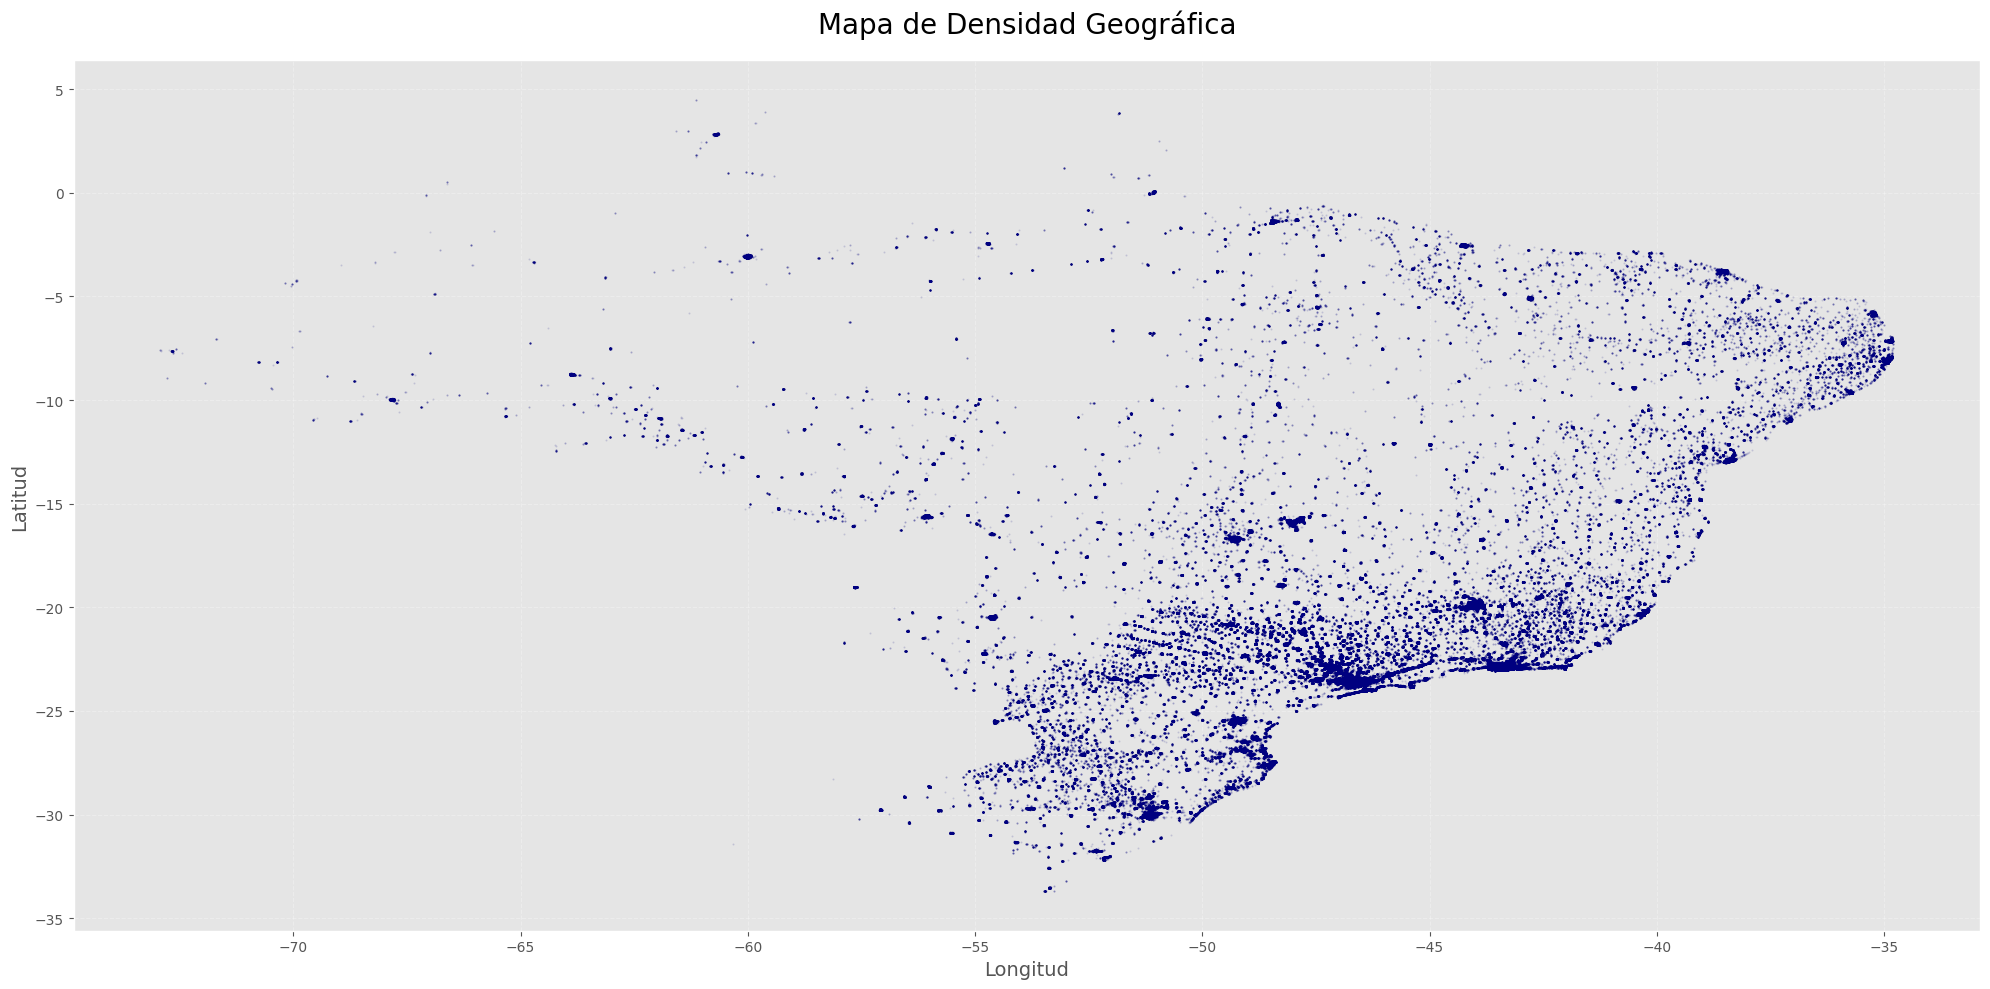

In [ ]:
# 1. Limpieza rápida: eliminamos coordenadas extremas (outliers)
# para que el mapa de Brasil no se vea deformado por errores en los datos
df_geo_clean = df_geolocation[
    (df_geolocation['geolocation_lat'] <= 5.27) & (df_geolocation['geolocation_lat'] >= -33.75) &
    (df_geolocation['geolocation_lng'] <= -34.79) & (df_geolocation['geolocation_lng'] >= -73.98)
]

# 2. Creación del mapa de calor por densidad de puntos
plt.figure(figsize=(20, 10)) # Formato muy ancho para ver el detalle geográfico

# Graficamos los puntos con una transparencia alta (alpha) para ver la densidad
plt.scatter(df_geo_clean['geolocation_lng'], df_geo_clean['geolocation_lat'],
            s=1, alpha=0.1, color='navy')

# Personalización
plt.title('Mapa de Densidad Geográfica', fontsize=20, pad=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)

# Ajustamos los límites para enfocar Brasil
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Exploring order_payments data

In [ ]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109080 entries, 0 to 109079
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              98934 non-null  object 
 1   payment_sequential    98533 non-null  float64
 2   payment_type          98733 non-null  object 
 3   payment_installments  98533 non-null  float64
 4   payment_value         98533 non-null  float64
 5   noise_flag            81825 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.0+ MB


In [ ]:
df_order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,noise_flag
count,98934,98533.000000,98733,98533.000000,98533.000000,81825
unique,90944,NaN,10,NaN,NaN,3
top,NÃ³ne,NaN,credit_card,NaN,NaN,B2
freq,543,NaN,68990,NaN,NaN,27439
mean,NaN,12049.470827,NaN,12348.340424,12177.918168,NaN
std,NaN,103143.956773,NaN,105079.532202,103289.900823,NaN
min,NaN,-50.000000,NaN,-50.000000,-50.000000,NaN
25%,NaN,1.000000,NaN,1.000000,56.440000,NaN
50%,NaN,1.000000,NaN,1.000000,100.950000,NaN
75%,NaN,1.000000,NaN,4.000000,177.680000,NaN


In [ ]:
exact_dups = df_order_payments.duplicated().sum()
print(f"Exact duplicated rows: {exact_dups}")

if exact_dups > 0:
    display(df_order_payments[df_order_payments.duplicated(keep=False)].head(10))


Exact duplicated rows: 11520


,order_id,payment_sequential,payment_type,payment_installments,payment_value,noise_flag
6,771ee386b001f06208a7419e4fc1bbd7,1.0,credit_card,1.0,81.16,B2
23,NaN,NaN,NaN,NaN,NaN,B2
34,e647bf617de735448a4ba54f8910393c,1.0,credit_card,1.0,65.09,A1
35,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,X9
53,NaN,NaN,NaN,NaN,NaN,X9
70,NaN,NaN,NaN,NaN,NaN,B2
87,NaN,NaN,NaN,NaN,NaN,X9
97,NaN,NaN,NaN,NaN,NaN,A1
102,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
logical_dups = df_order_payments.duplicated(
    subset=["order_id", "payment_sequential"]
).sum()

print(f"Duplicated (order_id, payment_sequential): {logical_dups}")

if logical_dups > 0:
    dup_payments = (
        df_order_payments[
            df_order_payments.duplicated(
                subset=["order_id", "payment_sequential"], keep=False
            )
        ]
        .sort_values(["order_id", "payment_sequential"])
        .head(10)
    )
    display(dup_payments)


Duplicated (order_id, payment_sequential): 14545


,order_id,payment_sequential,payment_type,payment_installments,payment_value,noise_flag
30765,0006ec9db01a64e59a68b2c340bf65a7,1.0,credit_card,4.0,97.32,B2
105236,0006ec9db01a64e59a68b2c340bf65a7,1.0,credit_card,4.0,97.32,A1
41628,000e63d38ae8c00bbcb5a30573b99628,1.0,credit_card,1.0,56.78,NaN
107905,000e63d38ae8c00bbcb5a30573b99628,1.0,credit_card,1.0,56.78,NaN
96282,002691433f09002ac9ca0c4e8dbb8ead,1.0,credit_card,1.0,120.43,NaN
106659,002691433f09002ac9ca0c4e8dbb8ead,1.0,credit_card,1.0,120.43,A1
5284,004d76fef3dd46eb4f70da049c8d1f93,1.0,boleto,1.0,147.39,NaN
105241,004d76fef3dd46eb4f70da049c8d1f93,1.0,boleto,1.0,147.39,NaN
15524,005f25968fc854ea16fb16f5bdbc87c7,1.0,credit_card,3.0,86.15,B2
107729,005f25968fc854ea16fb16f5bdbc87c7,1.0,credit_card,3.0,86.15,B2


In [ ]:
if df_order_payments is None:
    print("order_payments dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")

    nulls_per_column = df_order_payments.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_order_payments[df_order_payments.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_order_payments[df_order_payments.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")

NULL VALUES PER COLUMN:



order_id                10146
payment_sequential      10547
payment_type            10347
payment_installments    10547
payment_value           10547
noise_flag              27255
dtype: int64


Rows with at least one NULL value: 35412

Sample rows containing NULL values:


,order_id,payment_sequential,payment_type,payment_installments,payment_value,noise_flag
0,b81ef226f3fe1789b1e8b2Ã£cÃ£c839d17,1.0,credit_cÃ£rd,8.0,99.33,NaN
5,298fcdf1f73eb413e4d26d01b25bc1cd,1.0,credit_card,2.0,96.12,NaN
8,1f78449c87a54faf9e96e88ba1491fa9,123456.0,credit_card,-50.0,123456.00,NaN
10,d88e0d5fa41661ce03cf6cf336527646,1.0,credit_card,8.0,188.73,NaN
13,cf95215a722f3ebf29e6bbab87a29e61,1.0,credit_card,5.0,102.66,NaN
15,12e5cfe0e4716b59afb0e0f4a3bd6570,1.0,credit_card,10.0,157.45,NaN
17,79da3f5fe31ad1e454f06f95dc032ad5,1.0,credit_card,1.0,98.94,NaN
21,4214cda550ece8ee66441f459dc33a8c,1.0,credit_card,2.0,170.57,NaN
23,NaN,NaN,NaN,NaN,NaN,B2
25,5cfd514482e22bc992e7693f0e3e8df7,2.0,voucher,1.0,45.17,NaN


In [ ]:
# payment_value <= 0
invalid_payment_value = df_order_payments[df_order_payments["payment_value"] <= 0]
print(f"Payments with payment_value <= 0: {invalid_payment_value.shape[0]}")

if not invalid_payment_value.empty:
    display(invalid_payment_value.head(10))

# payment_installments <= 0
invalid_installments = df_order_payments[df_order_payments["payment_installments"] <= 0]
print(f"\nPayments with installments <= 0: {invalid_installments.shape[0]}")

if not invalid_installments.empty:
    display(invalid_installments.head(10))


Payments with payment_value <= 0: 1127


,order_id,payment_sequential,payment_type,payment_installments,payment_value,noise_flag
105,35525be13c4Ã£f8Ã£cÃ£e0bb6d13c27110d,123456.0,credit_cÃ£rd,-50.0,-50.0,X9
189,03afb3c10af52ddfa3c33b9881bf43f8,123456.0,credit_card,999999.0,-50.0,NaN
284,210a5f61a6a19892f81bb269863f4742,123456.0,credit_card,-50.0,-50.0,A1
430,e8f9288c671277ab525571871aef27cd,-50.0,credit_card,123456.0,-50.0,B2
510,NaN,123456.0,NaN,123456.0,-50.0,NaN
725,ee00fa5093eb96d8573403b382fb60a8,123456.0,boleto,-50.0,-50.0,X9
869,9a99c1f97699ec839f7966eb7c7d5afa,-50.0,credit_card,999999.0,-50.0,X9
910,15623f35d6d5eaa2fcd185a613927e86,999999.0,boleto,999999.0,-50.0,B2
931,2d0da8435c6493de84783c21578638aa,999999.0,credit_card,-50.0,-50.0,B2
971,7a7ce47ebeac8469117cd0b044c03d1b,-50.0,credit_card,-50.0,-50.0,A1



Payments with installments <= 0: 1138


,order_id,payment_sequential,payment_type,payment_installments,payment_value,noise_flag
8,1f78449c87a54faf9e96e88ba1491fa9,123456.0,credit_card,-50.0,123456.0,NaN
105,35525be13c4Ã£f8Ã£cÃ£e0bb6d13c27110d,123456.0,credit_cÃ£rd,-50.0,-50.0,X9
164,NaN,-50.0,NaN,-50.0,123456.0,X9
227,dc400373e624e9b0435847a79813c658,123456.0,voucher,-50.0,999999.0,A1
284,210a5f61a6a19892f81bb269863f4742,123456.0,credit_card,-50.0,-50.0,A1
285,009ac365164f8e06f59d18a08045f6c4,999999.0,voucher,-50.0,999999.0,NaN
384,a132f4bdf1eb9803546cef73ca7bd322,999999.0,credit_card,-50.0,123456.0,X9
532,08bc5bÃ£Ã£3dÃ£6ce0746413cd9cf227e9e,123456.0,credit_cÃ£rd,-50.0,123456.0,A1
609,9b6a1b8bf017b64d6ff4d7fe7cd88f1f,-50.0,credit_card,-50.0,123456.0,B2
725,ee00fa5093eb96d8573403b382fb60a8,123456.0,boleto,-50.0,-50.0,X9


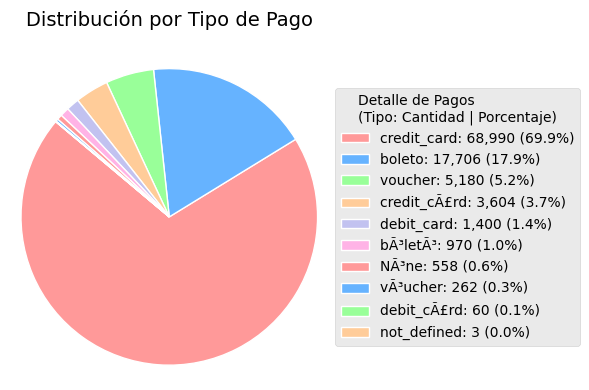

In [ ]:
import matplotlib.pyplot as plt

# 1. Preparación de los datos
payment_counts = df_order_payments['payment_type'].value_counts()
total_pagos = payment_counts.sum()

# 2. Creamos etiquetas que incluyan: Nombre, Cantidad y el % calculado manualmente
legend_labels = [
    f'{label}: {value:,} ({value/total_pagos:.1%})'
    for label, value in zip(payment_counts.index, payment_counts.values)
]

# 3. Creación del gráfico
plt.figure(figsize=(6, 4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', '#ffb3e6']

# Dibujamos la torta sin etiquetas ni porcentajes internos
patches, _ = plt.pie(
    payment_counts,
    labels=None,
    autopct=None,
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1} # Línea blanca para separar tajadas
)

# 4. Agregamos la leyenda con TODA la información
plt.legend(
    patches,
    legend_labels,
    title="Detalle de Pagos\n(Tipo: Cantidad | Porcentaje)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

plt.title('Distribución por Tipo de Pago', fontsize=14, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Exploring product data

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34599 entries, 0 to 34598
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  31376 non-null  object 
 1   product_category_name       31124 non-null  object 
 2   product_name_lenght         30663 non-null  float64
 3   product_description_lenght  30663 non-null  float64
 4   product_photos_qty          30663 non-null  float64
 5   product_weight_g            31230 non-null  float64
 6   product_length_cm           31230 non-null  float64
 7   product_height_cm           31230 non-null  float64
 8   product_width_cm            31230 non-null  float64
 9   noise_flag                  26020 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.6+ MB


In [ ]:
df_products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,noise_flag
count,31376,31124,30663.000000,30663.000000,30663.000000,31230.000000,31230.000000,31230.000000,31230.000000,26020
unique,29929,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NÃ³ne,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
freq,168,2442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8733
mean,NaN,NaN,12767.224864,13930.798976,12763.533183,13703.685014,11602.860391,12534.345085,12721.331796,NaN
std,NaN,NaN,106160.811881,108549.624361,106454.002229,100604.452747,100954.793885,105489.700631,106631.389149,NaN
min,NaN,NaN,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,14.000000,20.000000,NaN
75%,NaN,NaN,57.000000,1018.000000,3.000000,2050.000000,40.000000,22.000000,30.000000,NaN


In [ ]:
exact_dups = df_products.duplicated().sum()
print(f"Exact duplicated rows: {exact_dups}")

if exact_dups > 0:
    display(df_products[df_products.duplicated(keep=False)].head(10))


Exact duplicated rows: 3499


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,noise_flag
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,B2
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
88,7f34b85142d1ef9e077a0da9ada27385,moveis_decoracao,59.0,1750.0,3.0,2300.0,105.0,3.0,70.0,A1
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
159,43b6d9e46e1e6b8ac743a1c31e462937,ferramentas_jardim,31.0,680.0,1.0,7700.0,39.0,28.0,25.0,A1
173,NaN,categória,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,4473f3e5c65952b074ef987fa5c24662,telefonia,59.0,776.0,6.0,350.0,17.0,4.0,12.0,A1


In [ ]:
logical_dups = df_products["product_id"].duplicated().sum()
print(f"Duplicated product_id values: {logical_dups}")

if logical_dups > 0:
    dup_products = (
        df_products[df_products["product_id"].duplicated(keep=False)]
        .sort_values("product_id")
        .head(10)
    )
    display(dup_products)


Duplicated product_id values: 4669


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,noise_flag
4178,00210e41887c2a8ef9f791ebc780cc36,beleza_saude,56.0,3893.0,6.0,300.0,30.0,15.0,15.0,B2
33860,00210e41887c2a8ef9f791ebc780cc36,beleza_saude,-50.0,999999.0,999999.0,123456.0,999999.0,123456.0,123456.0,A1
34158,003938452c98ff9ab28e9e7b4bfe97ab,moveis_sala,52.0,420.0,2.0,5050.0,50.0,8.0,50.0,B2
147,003938452c98ff9ab28e9e7b4bfe97ab,moveis_sala,52.0,420.0,2.0,5050.0,50.0,8.0,50.0,X9
16699,003dbcabcf8e3231de657c7d9f9a5eba,esporte_lazer,43.0,1213.0,1.0,1800.0,30.0,22.0,22.0,X9
33546,003dbcabcf8e3231de657c7d9f9a5eba,categória,43.0,1213.0,1.0,1800.0,30.0,22.0,22.0,A1
19193,00929aaa7751a77220db9caa1ae6d3ab,utilidades_domesticas,56.0,279.0,2.0,2800.0,50.0,35.0,15.0,A1
33460,00929aaa7751a77220db9caa1ae6d3ab,utilidades_domesticas,56.0,279.0,2.0,2800.0,50.0,35.0,15.0,B2
33055,00faa46f36261af8bbf3a4d37fa4841b,Electronics,49.0,293.0,1.0,100.0,21.0,9.0,14.0,NaN
32865,00faa46f36261af8bbf3a4d37fa4841b,fashion_bolsas_e_acessorios,49.0,293.0,1.0,100.0,21.0,9.0,14.0,B2


In [ ]:
if df_products is None:
    print("products dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")

    nulls_per_column = df_products.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_products[df_products.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_products[df_products.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")

NULL VALUES PER COLUMN:



product_id                    3223
product_category_name         3475
product_name_lenght           3936
product_description_lenght    3936
product_photos_qty            3936
product_weight_g              3369
product_length_cm             3369
product_height_cm             3369
product_width_cm              3369
noise_flag                    8579
dtype: int64


Rows with at least one NULL value: 11617

Sample rows containing NULL values:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,noise_flag
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,NaN
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,NaN
12,cf55509ea8edaaac1d28fdb16e48fc22,instrumentos_musicais,43.0,1827.0,3.0,250.0,17.0,7.0,17.0,NaN
13,7bb6f29c2be57716194f96496660c7c2,moveis_decoracao,51.0,2083.0,2.0,600.0,68.0,11.0,13.0,NaN
22,e3e020af31d4d89d2602272b315c3f6e,beleza_saude,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9
30,47859fca9dd7485cbd93c3e8993bb74f,cama_mesa_banho,45.0,206.0,1.0,650.0,16.0,10.0,16.0,NaN
32,20e37962088a4061d3578def47a8648b,moveis_decoracao,60.0,208.0,1.0,800.0,40.0,10.0,34.0,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
invalid_dimensions = df_products[
    (df_products["product_weight_g"] <= 0) |
    (df_products["product_length_cm"] <= 0) |
    (df_products["product_height_cm"] <= 0) |
    (df_products["product_width_cm"] <= 0)
]

print(f"Products with invalid dimensions or weight: {invalid_dimensions.shape[0]}")

if not invalid_dimensions.empty:
    display(invalid_dimensions.head(10))


Products with invalid dimensions or weight: 843


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,noise_flag
27,c78b767da00efb70c1bcccab87c28cd5,informatica_acessorios,-50.0,-50.0,-50.0,123456.0,123456.0,-50.0,123456.0,X9
116,9e87e3ee09baee5f5c0513ff37bc60ab,cama_mesa_banho,123456.0,123456.0,123456.0,-50.0,999999.0,123456.0,999999.0,A1
149,5877301b00f95e3c6118738b293dfab3,eletrodomesticos,999999.0,-50.0,123456.0,-50.0,123456.0,123456.0,999999.0,X9
207,1b37262ebd1307a6c9aab9aca8584e76,pet_shop,123456.0,-50.0,123456.0,999999.0,999999.0,-50.0,999999.0,B2
398,78bd107dbc2f94f453c1bac8d2b4ede1,utilidades_domesticas,-50.0,-50.0,-50.0,-50.0,123456.0,999999.0,999999.0,B2
421,a8bb7885faf316d9a5062d42d2b2fba4,esporte_lazer,999999.0,999999.0,999999.0,-50.0,999999.0,123456.0,123456.0,X9
502,4732ecf5e4abee8f7ff4d1b8df0f7af5,automotivo,-50.0,-50.0,-50.0,123456.0,-50.0,123456.0,-50.0,A1
532,NaN,NaN,123456.0,-50.0,-50.0,123456.0,999999.0,123456.0,-50.0,NaN
535,4a37bc772078a013df64fd661ae5ee6c,beleza_saude,-50.0,999999.0,-50.0,999999.0,123456.0,-50.0,-50.0,B2
546,a963ea4d494221de09b70f1b4a70edbd,informatica_acessorios,-50.0,999999.0,123456.0,-50.0,999999.0,123456.0,999999.0,A1


# Exploring orders_reviews data

In [ ]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104185 entries, 0 to 104184
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_id                94338 non-null  object 
 1   order_id                 94535 non-null  object 
 2   review_score             94103 non-null  float64
 3   review_comment_title     15574 non-null  object 
 4   review_comment_message   42104 non-null  object 
 5   review_creation_date     94836 non-null  object 
 6   review_answer_timestamp  94836 non-null  object 
 7   noise_flag               78254 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.4+ MB


In [ ]:
df_order_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,noise_flag
count,94338,94535,94103.000000,15574,42104,94836,94836,78254
unique,89052,89625,NaN,4307,32976,632,84343,3
top,NÃ³ne,NÃ³ne,NaN,nÃ£n,nÃ£n,32/13/2020,32/13/2020,B2
freq,551,546,NaN,4090,2735,1762,1772,26284
mean,NaN,NaN,11882.132121,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,102426.084712,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,-50.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
exact_dups = df_order_reviews.duplicated().sum()
print(f"Exact duplicated rows: {exact_dups}")

if exact_dups > 0:
    display(df_order_reviews[df_order_reviews.duplicated(keep=False)].head(10))


Exact duplicated rows: 10944


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,noise_flag
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4.0,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,A1
50,c41bd21983e298a240410ebb391bf075,9562b424b05978a493db2a5122ecab1f,5.0,NaN,Tomara q dure pois é de pelinho.,2017-05-19 00:00:00,2017-05-21 03:04:35,B2
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9
77,b42460e68676135205af8b8c13baf6ae,5b2e79428198e5ce482f9ec1bd1014c3,5.0,NaN,NaN,2017-07-29 00:00:00,2017-08-01 18:43:09,B2
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9


In [ ]:
logical_dups = df_order_reviews["review_id"].duplicated().sum()
print(f"Duplicated review_id values: {logical_dups}")

if logical_dups > 0:
    dup_reviews = (
        df_order_reviews[df_order_reviews["review_id"].duplicated(keep=False)]
        .sort_values("review_id")
        .head(10)
    )
    display(dup_reviews)


Duplicated review_id values: 15132


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,noise_flag
100205,0005949d4c047d64863a6874338139ba,640883769bc5da4a077725646dc9995a,5.0,NaN,"Bom eu já sabia que era,mas é muito bonito.rec...",2017-06-20 00:00:00,2017-06-22 23:19:41,NaN
69053,0005949d4c047d64863a6874338139ba,640883769bc5da4a077725646dc9995a,5.0,NaN,"Bom eu já sabia que era,mas é muito bonito.rec...",2017-06-20 00:00:00,2017-06-22 23:19:41,X9
34550,000d524a3c693e342d163912ad74f156,378e9f1b518253964f1e82f349d90b7b,4.0,NaN,NaN,2017-05-17 00:00:00,2017-05-18 11:39:45,B2
101572,000d524a3c693e342d163912ad74f156,378e9f1b518253964f1e82f349d90b7b,4.0,NaN,NaN,2017-05-17 00:00:00,2017-05-18 11:39:45,X9
29841,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1.0,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23,NaN
46678,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1.0,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23,NaN
10861,002f414a7c4567ad01f3456c1689de74,87da4e556d02332032278169c291d571,4.0,NaN,NaN,??,??,A1
101776,002f414a7c4567ad01f3456c1689de74,87da4e556d02332032278169c291d571,4.0,NaN,NaN,2018-02-03 00:00:00,2018-02-05 23:58:28,A1
100554,003da935bbc8bc0808b8d980579d7f7e,08733fad8b29896d4920d381cd3f7cf1,5.0,NaN,Evitem mandar coisas pelos Correios. Tem muita...,2018-02-10 00:00:00,2018-02-12 13:05:05,A1
86711,003da935bbc8bc0808b8d980579d7f7e,08733fad8b29896d4920d381cd3f7cf1,5.0,NaN,Evitem mandar coisas pelos Correios. Tem muita...,2018-02-10 00:00:00,2018-02-12 13:05:05,A1


In [ ]:
if df_order_reviews is None:
    print("order_reviews dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")

    nulls_per_column = df_order_reviews.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_order_reviews[df_order_reviews.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_order_reviews[df_order_reviews.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")

NULL VALUES PER COLUMN:



review_id                   9847
order_id                    9650
review_score               10082
review_comment_title       88611
review_comment_message     62081
review_creation_date        9349
review_answer_timestamp     9349
noise_flag                 25931
dtype: int64


Rows with at least one NULL value: 94039

Sample rows containing NULL values:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,noise_flag
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,X9
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,A1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,X9
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,A1
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1.0,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,B2
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5.0,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34,NaN
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5.0,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06,B2
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5.0,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37,NaN
10,c9cfd2d5ab5911836ababae136c3a10c,cdf9aa68e72324eeb25c7de974696ee2,5.0,NaN,NaN,2017-12-23 00:00:00,2017-12-26 14:36:03,NaN
11,96052551d87e5f62e6c9f6974ec392e9,3d374c9e46530bb5ed4a7648915306a6,5.0,NaN,NaN,32/13/2020,??,NaN


In [ ]:
invalid_scores = df_order_reviews[
    (df_order_reviews["review_score"] < 1) |
    (df_order_reviews["review_score"] > 5)
]

print(f"Reviews with invalid scores: {invalid_scores.shape[0]}")

if not invalid_scores.empty:
    display(invalid_scores.head(10))


Reviews with invalid scores: 3126


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,noise_flag
41,eb26c2bfb5030f57dcef30d3f111eb1e,88096595631e8d26b658306256e3ce34,123456.0,NaN,NaN,2018-02-08 00:00:00,2018-02-10 04:28:43,NaN
84,5733e2aeeb52b99d044a2a3644e1305d,5abb6c1ea24afdc6e26076bfaa7539cb,123456.0,NaN,NaN,2018-02-23 00:00:00,2018-02-23 11:06:24,B2
91,1090909fÃ£Ã£e22e5Ã£b76903e8493063f1,Ã£1341cb83bbf1b47392f4Ã£3685d56bÃ£d,123456.0,nÃ£n,nÃ£n,2018-03-07 00:00:00,2018-03-07 15:32:23,B2
102,NaN,FAKE_KEY_1268,-50.0,NaN,NaN,NaN,NaN,A1
105,28f275d52ccd8b6614b71430481450fd,7ed1923ef9c8ce180035Ã£cd26Ã£2d8eÃ£e,123456.0,nÃ£n,nÃ£n,2018-06-21 00:00:00,2018-06-21 20:33:50,X9
137,5a27bebda2d497ab1fbc6f425abdc6b8,824ed066dde5116b8bcf4d75381e056d,-50.0,NaN,NaN,2018-04-12 00:00:00,2018-04-13 11:56:19,B2
143,a55012f5c7e74353e92986be15d133b6,54b73f808b0ff25da4276773c30ac269,123456.0,NaN,Gostei muito do jogo de banho.A estampa florid...,2017-06-03 00:00:00,2017-06-04 02:22:55,NaN
160,d8f61c7fcd172785563a65cd65a8cea8,cf34fe44babb9fd001a001acfa43cabf,999999.0,NaN,OK,2017-11-19 00:00:00,2017-11-22 19:34:39,B2
164,ecb87d3794a6b2a32e6d9ebee0b8dee5,b1b42afa1e73f34f90872f5f1ec48391,123456.0,NaN,NaN,2018-08-04 00:00:00,2018-08-07 18:50:13,X9
285,cc2b21775364b08a1ee52c1405cef6fa,8624ba83187b6280c6d8b7664a5f5607,123456.0,NaN,NaN,2018-04-21 00:00:00,2018-04-24 15:12:54,X9


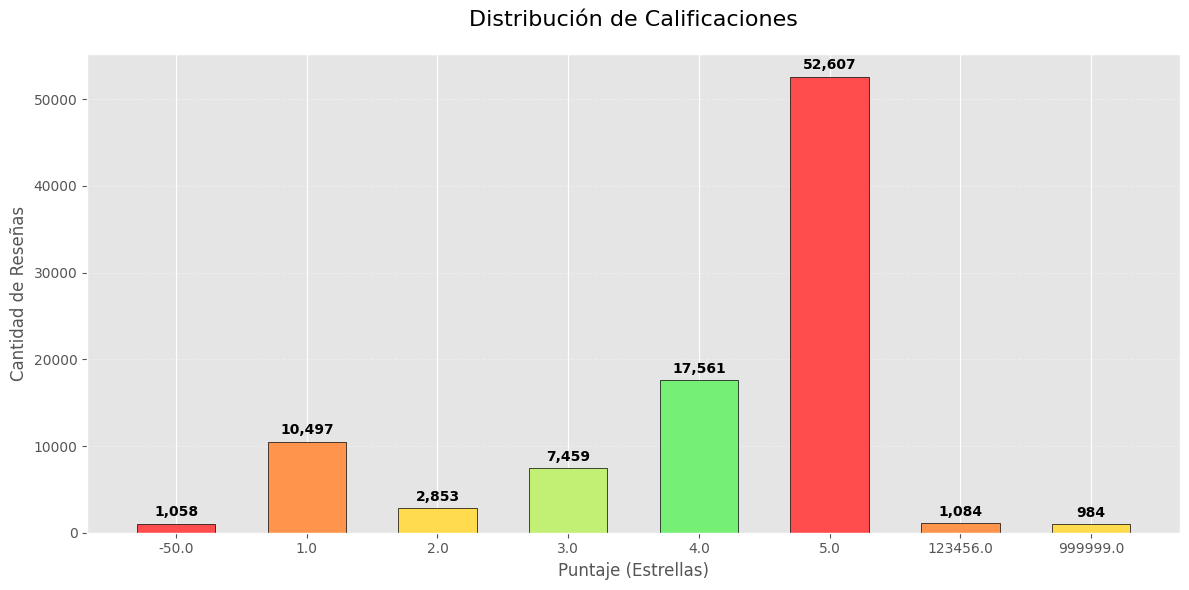

In [ ]:
# 1. Preparación de los datos
# Contamos cuántas veces aparece cada puntaje (1 a 5)
review_counts = df_order_reviews['review_score'].value_counts().sort_index()

# 2. Creación del gráfico
plt.figure(figsize=(12, 6))

# Usamos una paleta de colores que vaya de rojo (bajo) a verde (alto)
colors = ['#ff4d4d', '#ff944d', '#ffdb4d', '#c2f075', '#75f075']

# Graficamos
bars = plt.bar(review_counts.index.astype(str), review_counts.values, color=colors, edgecolor='black', width=0.6)

# 3. Personalización
plt.title('Distribución de Calificaciones', fontsize=16, pad=20)
plt.xlabel('Puntaje (Estrellas)', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)

# Añadimos el número exacto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Limpiamos el diseño
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

# Exploring sellers data

In [ ]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               2941 non-null   object 
 1   seller_zip_code_prefix  2932 non-null   float64
 2   seller_city             2936 non-null   object 
 3   seller_state            2936 non-null   object 
 4   noise_flag              2418 non-null   object 
dtypes: float64(1), object(4)
memory usage: 127.1+ KB


In [ ]:
df_sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state,noise_flag
count,2941,2932.000000,2936,2936,2418
unique,2808,NaN,635,24,3
top,NÃ³ne,NaN,sao paulo,SP,X9
freq,19,NaN,635,1757,855
mean,NaN,43121.593793,NaN,NaN,NaN
std,NaN,105998.421780,NaN,NaN,NaN
min,NaN,-50.000000,NaN,NaN,NaN
25%,NaN,7031.750000,NaN,NaN,NaN
50%,NaN,14940.000000,NaN,NaN,NaN
75%,NaN,72152.000000,NaN,NaN,NaN


In [ ]:
exact_dups = df_sellers.duplicated().sum()
print(f"Exact duplicated rows: {exact_dups}")

if exact_dups > 0:
    display(df_sellers[df_sellers.duplicated(keep=False)].head(10))


Exact duplicated rows: 334


,seller_id,seller_zip_code_prefix,seller_city,seller_state,noise_flag
0,NaN,NaN,NaN,NaN,B2
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195.0,sao paulo,SP,NaN
14,NaN,NaN,NaN,NaN,B2
25,NaN,999999.0,NaN,NaN,B2
32,NaN,NaN,NaN,NaN,X9
44,NaN,NaN,NaN,NaN,A1
45,NaN,NaN,NaN,NaN,B2
51,NaN,NaN,NaN,NaN,B2
52,NaN,NaN,NaN,NaN,A1
63,NaN,NaN,NaN,NaN,B2


In [ ]:
logical_dups = df_sellers["seller_id"].duplicated().sum()
print(f"Duplicated seller_id values: {logical_dups}")

if logical_dups > 0:
    dup_sellers = (
        df_sellers[df_sellers["seller_id"].duplicated(keep=False)]
        .sort_values("seller_id")
        .head(10)
    )
    display(dup_sellers)


Duplicated seller_id values: 441


,seller_id,seller_zip_code_prefix,seller_city,seller_state,noise_flag
3201,0432ead42b6c8a0bdf68154add917fdf,9320.0,maua,SP,NaN
777,0432ead42b6c8a0bdf68154add917fdf,9320.0,maua,SP,B2
3247,0509040ea3fe50071181bbc359eb7738,31710.0,belo horizonte,MG,NaN
2402,0509040ea3fe50071181bbc359eb7738,31710.0,belo horizonte,MG,NaN
3107,05aebce0b5c8f0d41b29b686f2d05fd3,3962.0,sao paulo,SP,NaN
2018,05aebce0b5c8f0d41b29b686f2d05fd3,3962.0,sao paulo,SP,A1
3240,08061dc0fc165ed41288cc7acde738ee,6036.0,osasco,SP,A1
1032,08061dc0fc165ed41288cc7acde738ee,6036.0,osasco,SP,X9
2614,0873d9f8f36123f8d910f4760e788cfb,6465.0,barueri,SP,A1
3244,0873d9f8f36123f8d910f4760e788cfb,6465.0,barueri,SP,B2


In [ ]:
if df_sellers is None:
    print("sellers dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")

    nulls_per_column = df_sellers.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_sellers[df_sellers.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_sellers[df_sellers.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")

NULL VALUES PER COLUMN:



seller_id                 309
seller_zip_code_prefix    318
seller_city               314
seller_state              314
noise_flag                832
dtype: int64


Rows with at least one NULL value: 1080

Sample rows containing NULL values:


,seller_id,seller_zip_code_prefix,seller_city,seller_state,noise_flag
0,NaN,NaN,NaN,NaN,B2
1,d1b65fc7debc3361ea86b5f14c68d2e2,123456.0,mogi guacu,SP,NaN
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195.0,sao paulo,SP,NaN
6,e49c26c3edfa46d227d5121a6b6e4d37,55325.0,brejao,PE,NaN
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310.0,curitiba,PR,NaN
10,8cb7c5ddf41f4d506ebÃ£76e9Ã£4702Ã£25,75110.0,Ã£nÃ£pÃ³lis,GO,NaN
12,8bd0f31cf0a614c658f6763bd02dea69,1222.0,sao paulo,SP,NaN
14,NaN,NaN,NaN,NaN,B2
23,2ff97219cb8622eaf3cd89b7d9c09824,13320.0,salto,SP,NaN
25,NaN,999999.0,NaN,NaN,B2


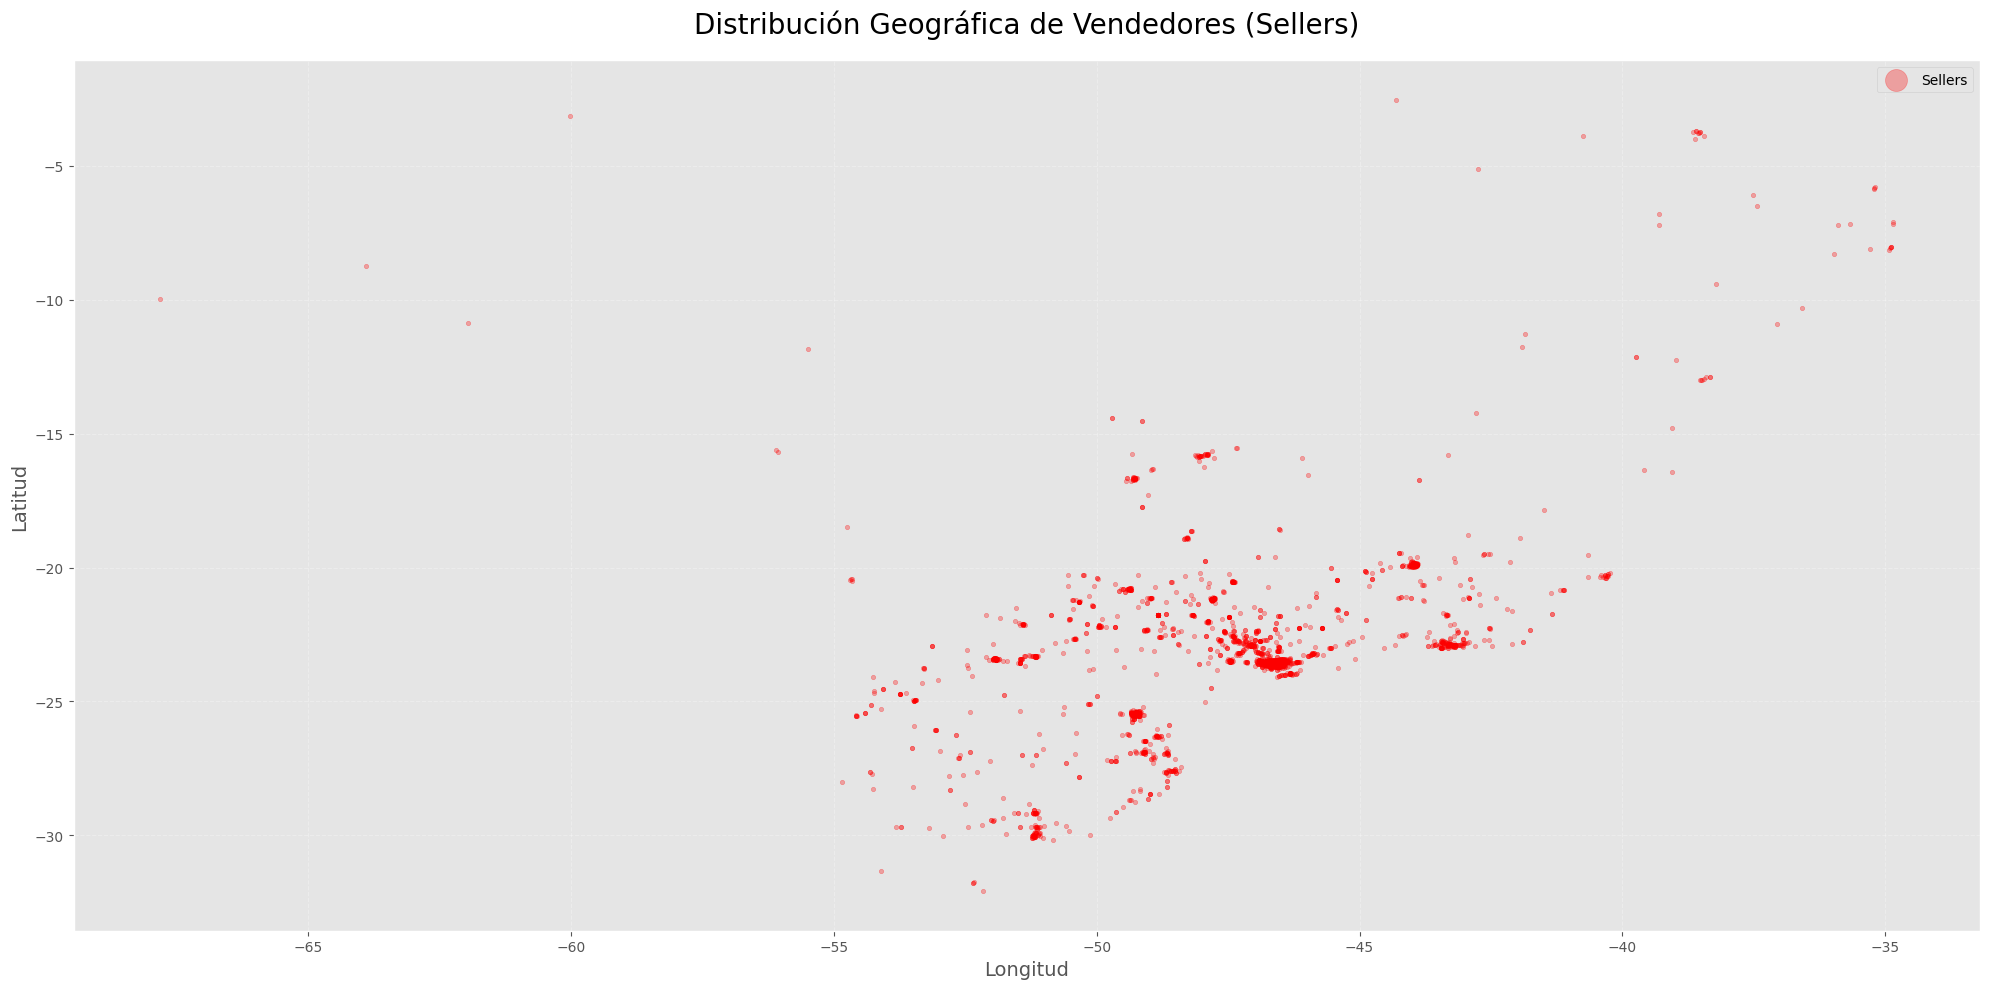

Top 5 estados con más vendedores:
seller_state
SP    1757
PR     327
MG     238
SC     163
RJ     155
Name: count, dtype: int64


In [ ]:
# 1. Unimos los vendedores con la geolocalización
# Primero, eliminamos duplicados en geolocalización por código postal para que sea más rápido
geo_unique = df_geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])

# Hacemos el merge con los vendedores
df_sellers_geo = pd.merge(
    df_sellers,
    geo_unique,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

# 2. Limpieza de coordenadas extremas (igual que antes para centrar Brasil)
df_sellers_geo = df_sellers_geo[
    (df_sellers_geo['geolocation_lat'] <= 5.27) & (df_sellers_geo['geolocation_lat'] >= -33.75) &
    (df_sellers_geo['geolocation_lng'] <= -34.79) & (df_sellers_geo['geolocation_lng'] >= -73.98)
]

# 3. Creación del mapa de Sellers
plt.figure(figsize=(20, 10))

# Usamos un color distinto (ej: 'red') para diferenciar a los vendedores de los clientes
plt.scatter(df_sellers_geo['geolocation_lng'], df_sellers_geo['geolocation_lat'],
            s=10, alpha=0.3, color='red', label='Sellers')

# Personalización
plt.title('Distribución Geográfica de Vendedores (Sellers)', fontsize=20, pad=20)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(markerscale=5) # Para que el punto rojo se vea bien en la leyenda

plt.tight_layout()
plt.show()

# Extra: Mostrar los 5 estados con más vendedores
top_states_sellers = df_sellers['seller_state'].value_counts().head(5)
print("Top 5 estados con más vendedores:")
print(top_states_sellers)

# Exploring category_translation data

In [ ]:
df_category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          69 non-null     object
 1   product_category_name_english  69 non-null     object
 2   noise_flag                     55 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [ ]:
df_category_translation.describe(include="all")

,product_category_name,product_category_name_english,noise_flag
count,69,69,55
unique,61,63,3
top,electróncos,electróncos,A1
freq,4,3,23


In [ ]:
exact_dups = df_category_translation.duplicated().sum()
print(f"Exact duplicated rows: {exact_dups}")

if exact_dups > 0:
    display(df_category_translation[df_category_translation.duplicated(keep=False)].head(10))


Exact duplicated rows: 3


,product_category_name,product_category_name_english,noise_flag
0,NaN,NaN,A1
18,NaN,NaN,A1
49,NaN,NaN,A1
65,dvds_blu_ray,dvds_blu_ray,NaN
71,dvds_blu_ray,dvds_blu_ray,NaN


In [ ]:
logical_dups_pt = df_category_translation["product_category_name"].duplicated().sum()
print(f"Duplicated product_category_name (PT): {logical_dups_pt}")

if logical_dups_pt > 0:
    dup_pt = (
        df_category_translation[
            df_category_translation["product_category_name"].duplicated(keep=False)
        ]
        .sort_values("product_category_name")
        .head(10)
    )
    display(dup_pt)


Duplicated product_category_name (PT): 13


,product_category_name,product_category_name_english,noise_flag
50,ELETRONICOOS,ELETRONICOOS,A1
64,ELETRONICOOS,Electronics,B2
67,artes_e_artesanato,arts_and_craftmanship,NaN
73,artes_e_artesanato,arts_and_craftmanship,B2
54,artigos_de_natal,christmas_supplies,A1
74,artigos_de_natal,christmas_supplies,X9
2,categória,ELETRONICOOS,X9
12,categória,electróncos,NaN
65,dvds_blu_ray,dvds_blu_ray,NaN
71,dvds_blu_ray,dvds_blu_ray,NaN


In [ ]:
if df_category_translation is None:
    print("category_translation dataset not available")
else:
    print("NULL VALUES PER COLUMN:\n")

    nulls_per_column = df_category_translation.isnull().sum()
    display(nulls_per_column[nulls_per_column > 0])

    total_null_rows = df_category_translation[df_category_translation.isnull().any(axis=1)].shape[0]
    print(f"\nRows with at least one NULL value: {total_null_rows}")

    if total_null_rows > 0:
        print("\nSample rows containing NULL values:")
        null_sample = df_category_translation[df_category_translation.isnull().any(axis=1)].head(10)
        display(null_sample)
    else:
        print("No NULL values found in the dataset")

NULL VALUES PER COLUMN:



product_category_name             6
product_category_name_english     6
noise_flag                       20
dtype: int64


Rows with at least one NULL value: 25

Sample rows containing NULL values:


,product_category_name,product_category_name_english,noise_flag
0,NaN,NaN,A1
1,informatica_acessorios,computers_accessories,NaN
4,NaN,NaN,B2
9,relogios_presentes,watches_gifts,NaN
10,NaN,NaN,X9
11,bebes,baby,NaN
12,categória,electróncos,NaN
16,ferramentas_jardim,garden_tools,NaN
18,NaN,NaN,A1
21,fashion_calcados,fashion_shoes,NaN


In [ ]:
missing_translation = df_category_translation[
    df_category_translation["product_category_name_english"].isnull()
]
print(f"Rows with missing english translation: {missing_translation.shape[0]}")

if not missing_translation.empty:
    display(missing_translation.head(10))


Rows with missing english translation: 6


,product_category_name,product_category_name_english,noise_flag
0,NaN,NaN,A1
4,NaN,NaN,B2
10,NaN,NaN,X9
18,NaN,NaN,A1
49,NaN,NaN,A1
55,NaN,NaN,NaN


In [ ]:
if df_products is None or df_category_translation is None:
    print("Required datasets not available")
else:
    # Unique categories in products
    product_categories = (
        df_products["product_category_name"]
        .dropna()
        .unique()
    )

    # Categories available in translation table
    translated_categories = (
        df_category_translation["product_category_name"]
        .dropna()
        .unique()
    )

    # Categories in products without translation
    missing_translation = set(product_categories) - set(translated_categories)

    print(f"Total unique categories in products: {len(product_categories)}")
    print(f"Categories with translation: {len(translated_categories)}")
    print(f"Categories WITHOUT translation: {len(missing_translation)}")

    if len(missing_translation) > 0:
        print("\nSample categories without translation:")
        display(list(missing_translation)[:10])
    else:
        print("All product categories have a translation")

Total unique categories in products: 138
Categories with translation: 61
Categories WITHOUT translation: 77

Sample categories without translation:


['fashion_bolsas_e_acessorios',
 'Ã£limentÃ³s',
 'livrÃ³s_tecnicÃ³s',
 'electróncÃ³s',
 'construcao_ferramentas_seguranca',
 'fÃ£shiÃ³n_underweÃ£r_e_mÃ³dÃ£_prÃ£iÃ£',
 'cÃ£sÃ£_cÃ³nfÃ³rtÃ³',
 'belezÃ£_sÃ£ude',
 'brinquedÃ³s',
 'nÃ£n']

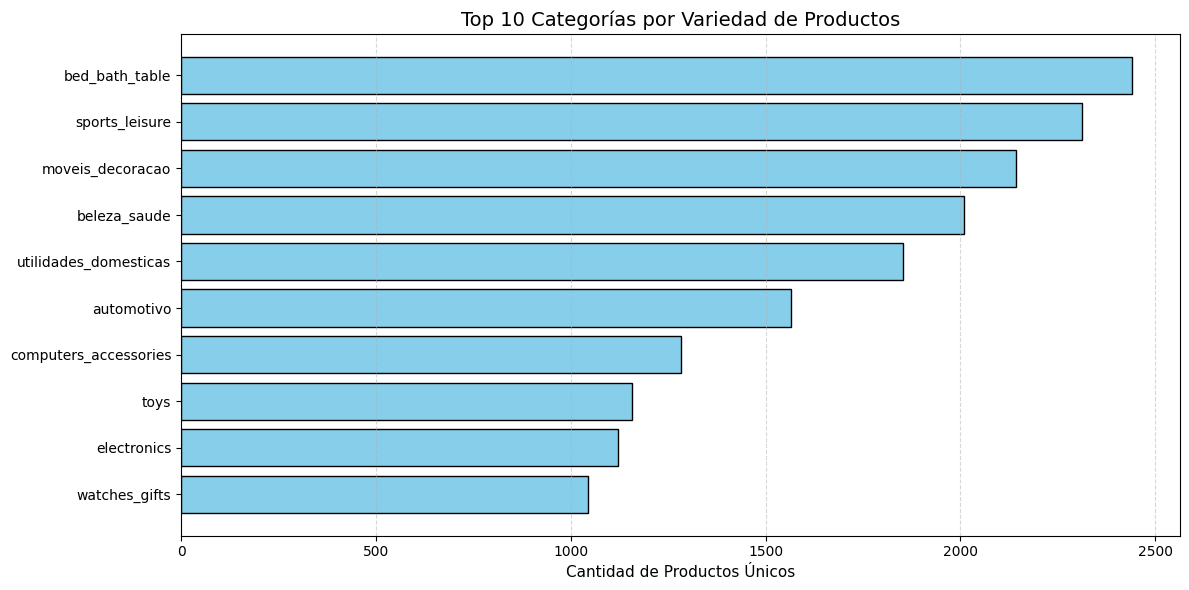

In [ ]:
import matplotlib.pyplot as plt

# 1. Crear un diccionario de traducción (ligero y rápido)
# Esto mapea: {'portugues': 'ingles'}
mapping = dict(zip(df_category_translation['product_category_name'],
                   df_category_translation['product_category_name_english']))

# 2. Contar categorías en el df de productos (sin hacer merge con ventas)
# Esto nos da una idea de la variedad de catálogo
top_categories = df_products['product_category_name'].value_counts().head(10)

# 3. Traducir solo los nombres del Top 10 usando el diccionario
translated_labels = [mapping.get(cat, cat) for cat in top_categories.index]

# 4. Gráfico de barras horizontal
plt.figure(figsize=(12, 6))
plt.barh(translated_labels, top_categories.values, color='skyblue', edgecolor='black')

plt.title('Top 10 Categorías por Variedad de Productos', fontsize=14)
plt.xlabel('Cantidad de Productos Únicos', fontsize=11)
plt.gca().invert_yaxis() # La más alta arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()